# CV LAB 1
## Group : Unfiltered Commentary
### Oriinga Maudu : 2433303
### Tumi Jourdan : 2180153
### Raees Moosa : 2322203

## NOTE: for us to remember error
when we take 1 - np array values results in float, so then we do comparison between img and inverse mask ,to extract the fg or bg it add a third dimension
**ALWAYS THRESHOLD THE INVERSE MASK THEN APPLY IT TO GET THE BACKGROUND ONLY**

In [1]:
import cv2
import numpy as np
import skimage
import imageio
import mpmath
import matplotlib.pyplot as plt
import seaborn as sns
import PIL

# Section 3
Read and Display Images

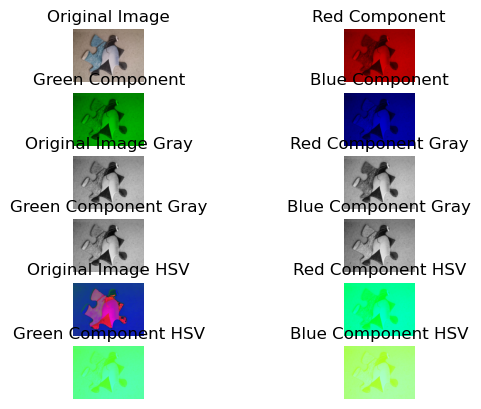

In [2]:
img = cv2.imread('Images/image-35.jpg')
img = img[:,:,::-1]
red, green, blue = cv2.split(img)
empty = red * 0

red_image = cv2.merge([red, empty, empty])
green_image = cv2.merge([empty, green, empty])
blue_image = cv2.merge([empty, empty, blue])

plt.subplot(6, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(6, 2, 2)
plt.imshow(red_image)
plt.title('Red Component')
plt.axis('off')

plt.subplot(6, 2, 3)
plt.imshow(green_image)
plt.title('Green Component')
plt.axis('off')

plt.subplot(6, 2, 4)
plt.imshow(blue_image)
plt.title('Blue Component')
plt.axis('off')

plt.subplot(6, 2, 5)
plt.imshow(skimage.color.rgb2gray(img),cmap="gray")
plt.title('Original Image Gray')
plt.axis('off')

plt.subplot(6, 2, 6)
plt.imshow(skimage.color.rgb2gray(red_image),cmap="gray")
plt.title('Red Component Gray')
plt.axis('off')

plt.subplot(6, 2, 7)
plt.imshow(skimage.color.rgb2gray(green_image),cmap="gray")
plt.title('Green Component Gray')
plt.axis('off')

plt.subplot(6, 2, 8)
plt.imshow(skimage.color.rgb2gray(blue_image),cmap="gray")
plt.title('Blue Component Gray')
plt.axis('off')

plt.subplot(6, 2, 9)
plt.imshow(skimage.color.rgb2hsv(img))
plt.title('Original Image HSV')
plt.axis('off')

plt.subplot(6, 2, 10)
plt.imshow(skimage.color.rgb2hsv(red_image))
plt.title('Red Component HSV')
plt.axis('off')

plt.subplot(6, 2, 11)
plt.imshow(skimage.color.rgb2hsv(green_image))
plt.title('Green Component HSV')
plt.axis('off')

plt.subplot(6, 2, 12)
plt.imshow(skimage.color.rgb2hsv(blue_image))
plt.title('Blue Component HSV')
plt.axis('off')

plt.show()


# Section 4

In [3]:
print("1. width:",img.shape[0], "\theight", img.shape[1])
mask = cv2.cvtColor(cv2.imread('Images/mask-35.png'), cv2.COLOR_BGR2GRAY).astype(np.uint8)
mask = mask >128
white_pix = np.sum(mask>0.5)
print("2. Num white pixels:",white_pix)

#=========================================================================

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).astype(np.uint8)

print("3. Max value in grayscale:",np.max(gray_img))

img_with_mask = gray_img*mask
print("4. Max pixel in puzzle:",np.max(img_with_mask))

print("5. Mean intensity for image:",np.mean(gray_img))

print("6. Mean brightness of puzzle pixels",np.mean(img_with_mask[mask]))
# plt.imshow(img_with_mask, cmap="gray")
inverse_mask = (1-mask) > 0.5
print("7. Mean brightness of background pixels",np.mean(gray_img[inverse_mask]))
# print(img_with_mask[inverse_mask].flatten().shape)
print("8. Variance of puzzle pixels",np.var(img_with_mask[mask]))
print("9. Variance of bakground pixels",np.var(gray_img[inverse_mask]))

1. width: 450 	height 600
2. Num white pixels: 74571
3. Max value in grayscale: 229
4. Max pixel in puzzle: 229
5. Mean intensity for image: 134.78168518518518
6. Mean brightness of puzzle pixels 115.12011371712865
7. Mean brightness of background pixels 142.2840673595014
8. Variance of puzzle pixels 2548.400224503301
9. Variance of bakground pixels 528.8448132085681


# Plotting 10, 11, 12 in this

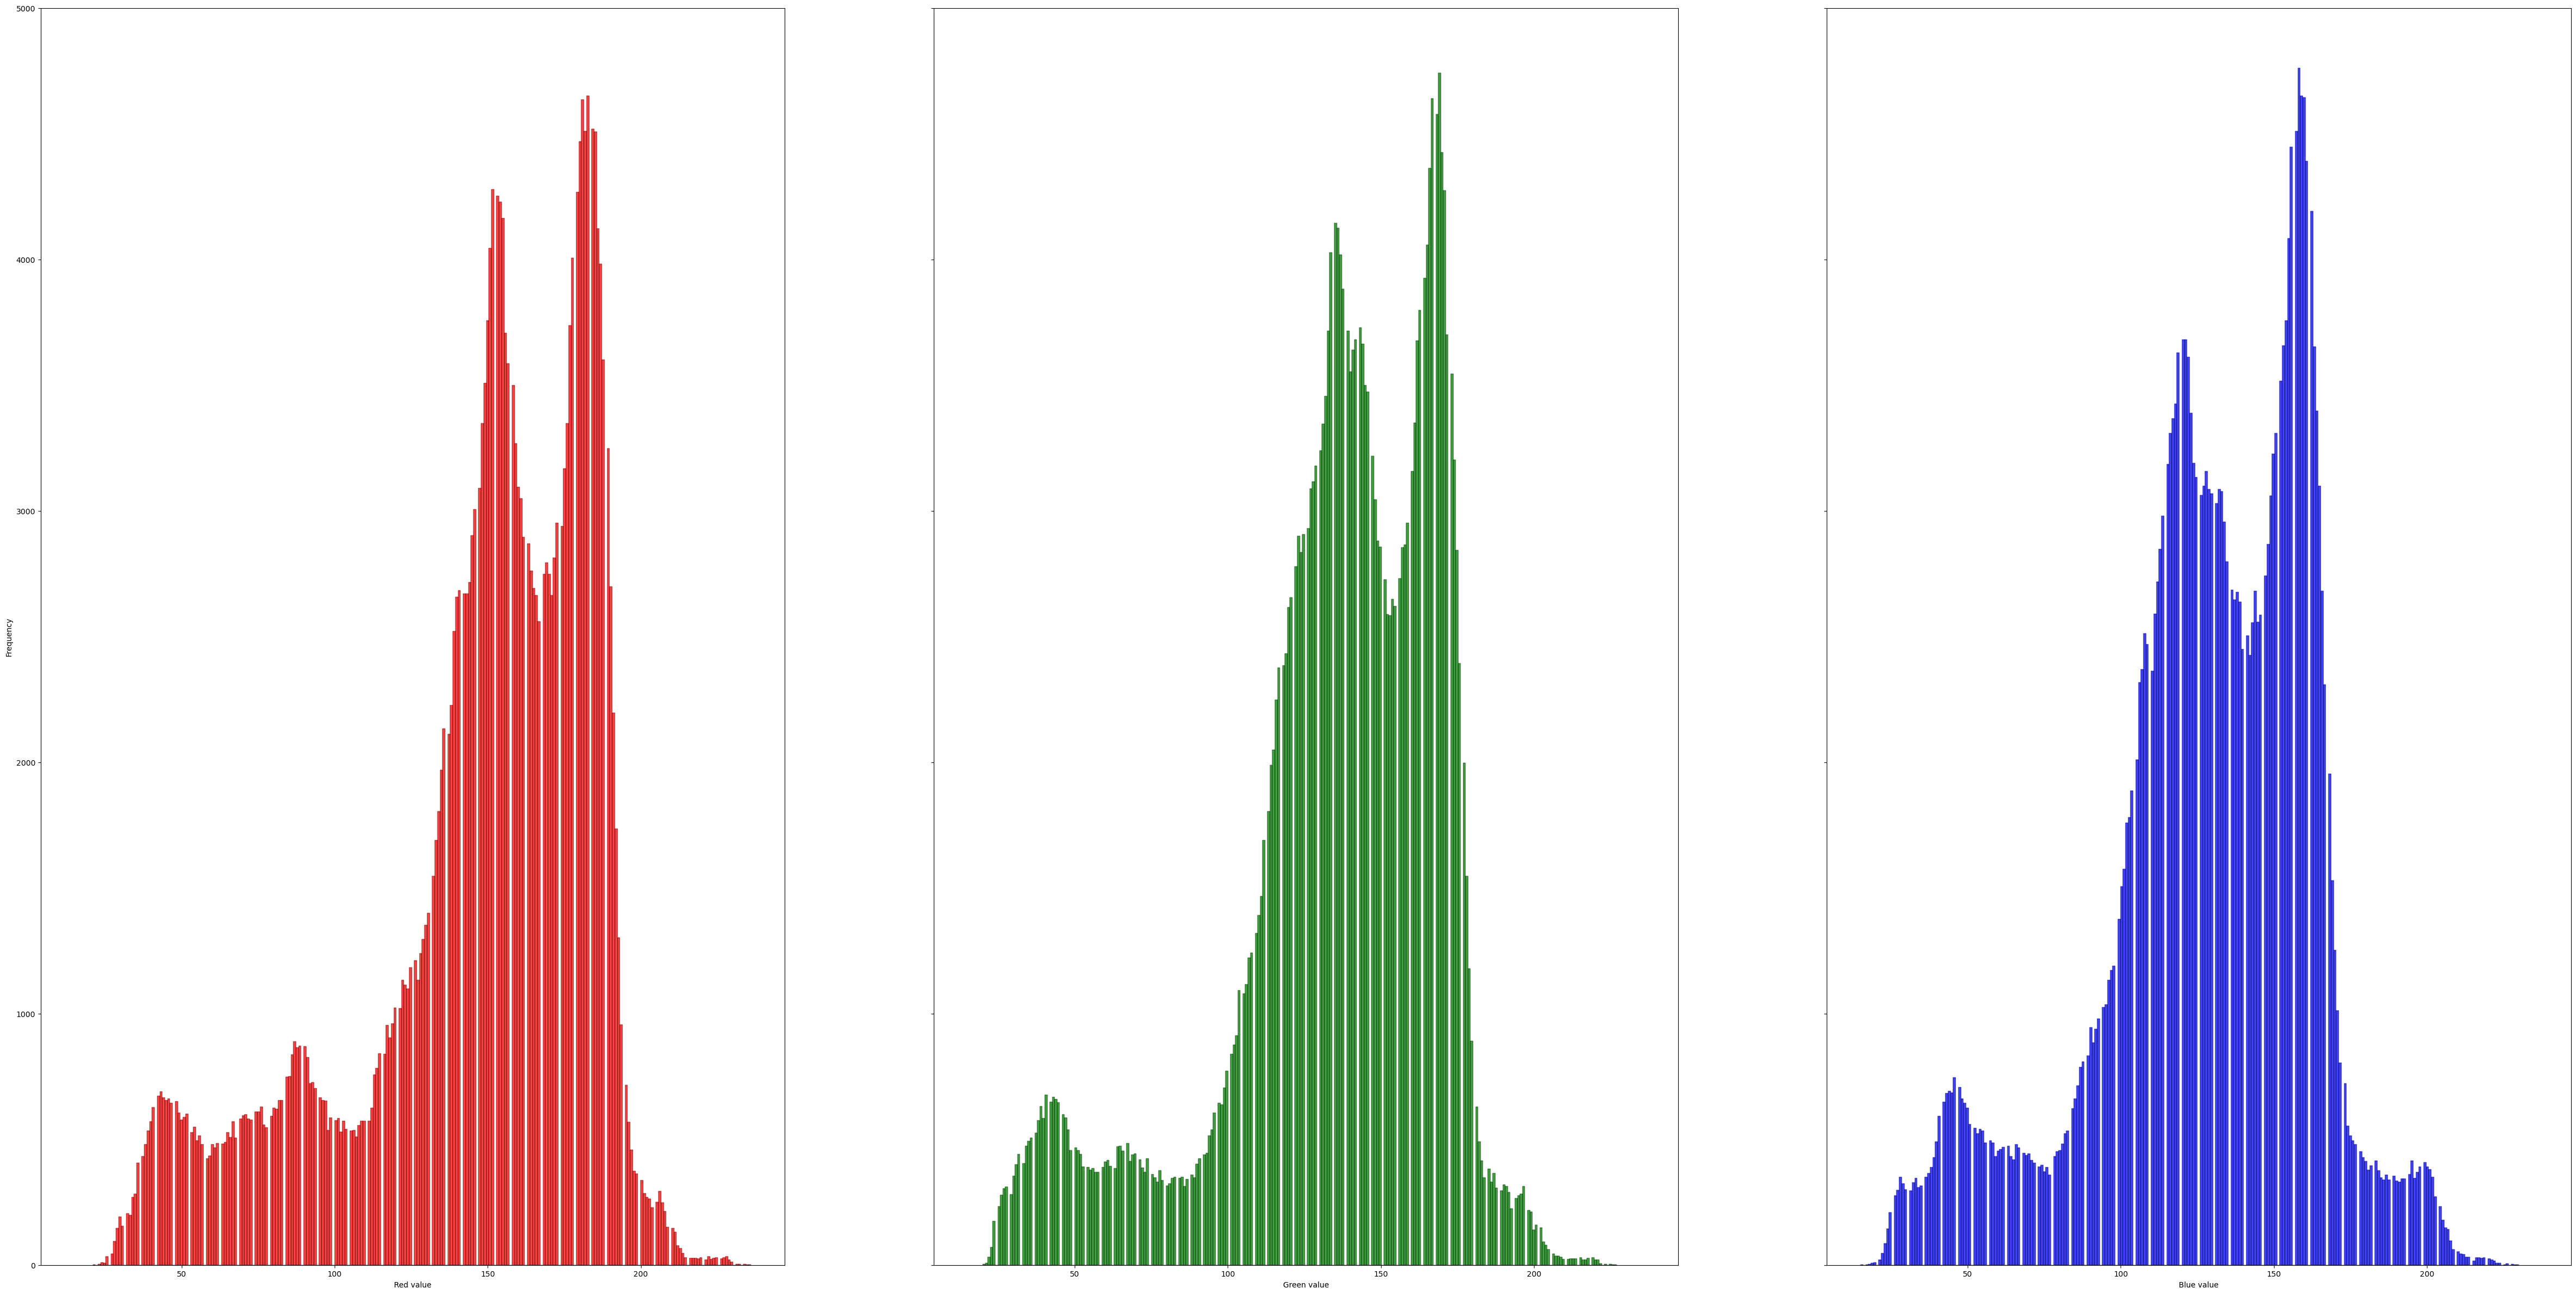

In [4]:
red_hist =  red.flatten()
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(60,30), sharex=True, sharey=True)
plt.subplot(1,3,1)
sns.histplot( red_hist, bins=256, kde=False,color='red')
plt.xlabel("Red value")
plt.ylabel("Frequency")

green_hist =  green.flatten()

plt.subplot(1,3,2)
sns.histplot( green_hist, bins=256, kde=False,color='green')
plt.xlabel("Green value")
plt.ylabel("Frequency")

blue_hist =  blue.flatten()

plt.subplot(1,3,3)
sns.histplot( blue_hist, bins=256, kde=False,color='blue')
plt.xlabel("Blue value")
plt.ylabel("Frequency")
plt.show()

# plotting 13 - for the mask img

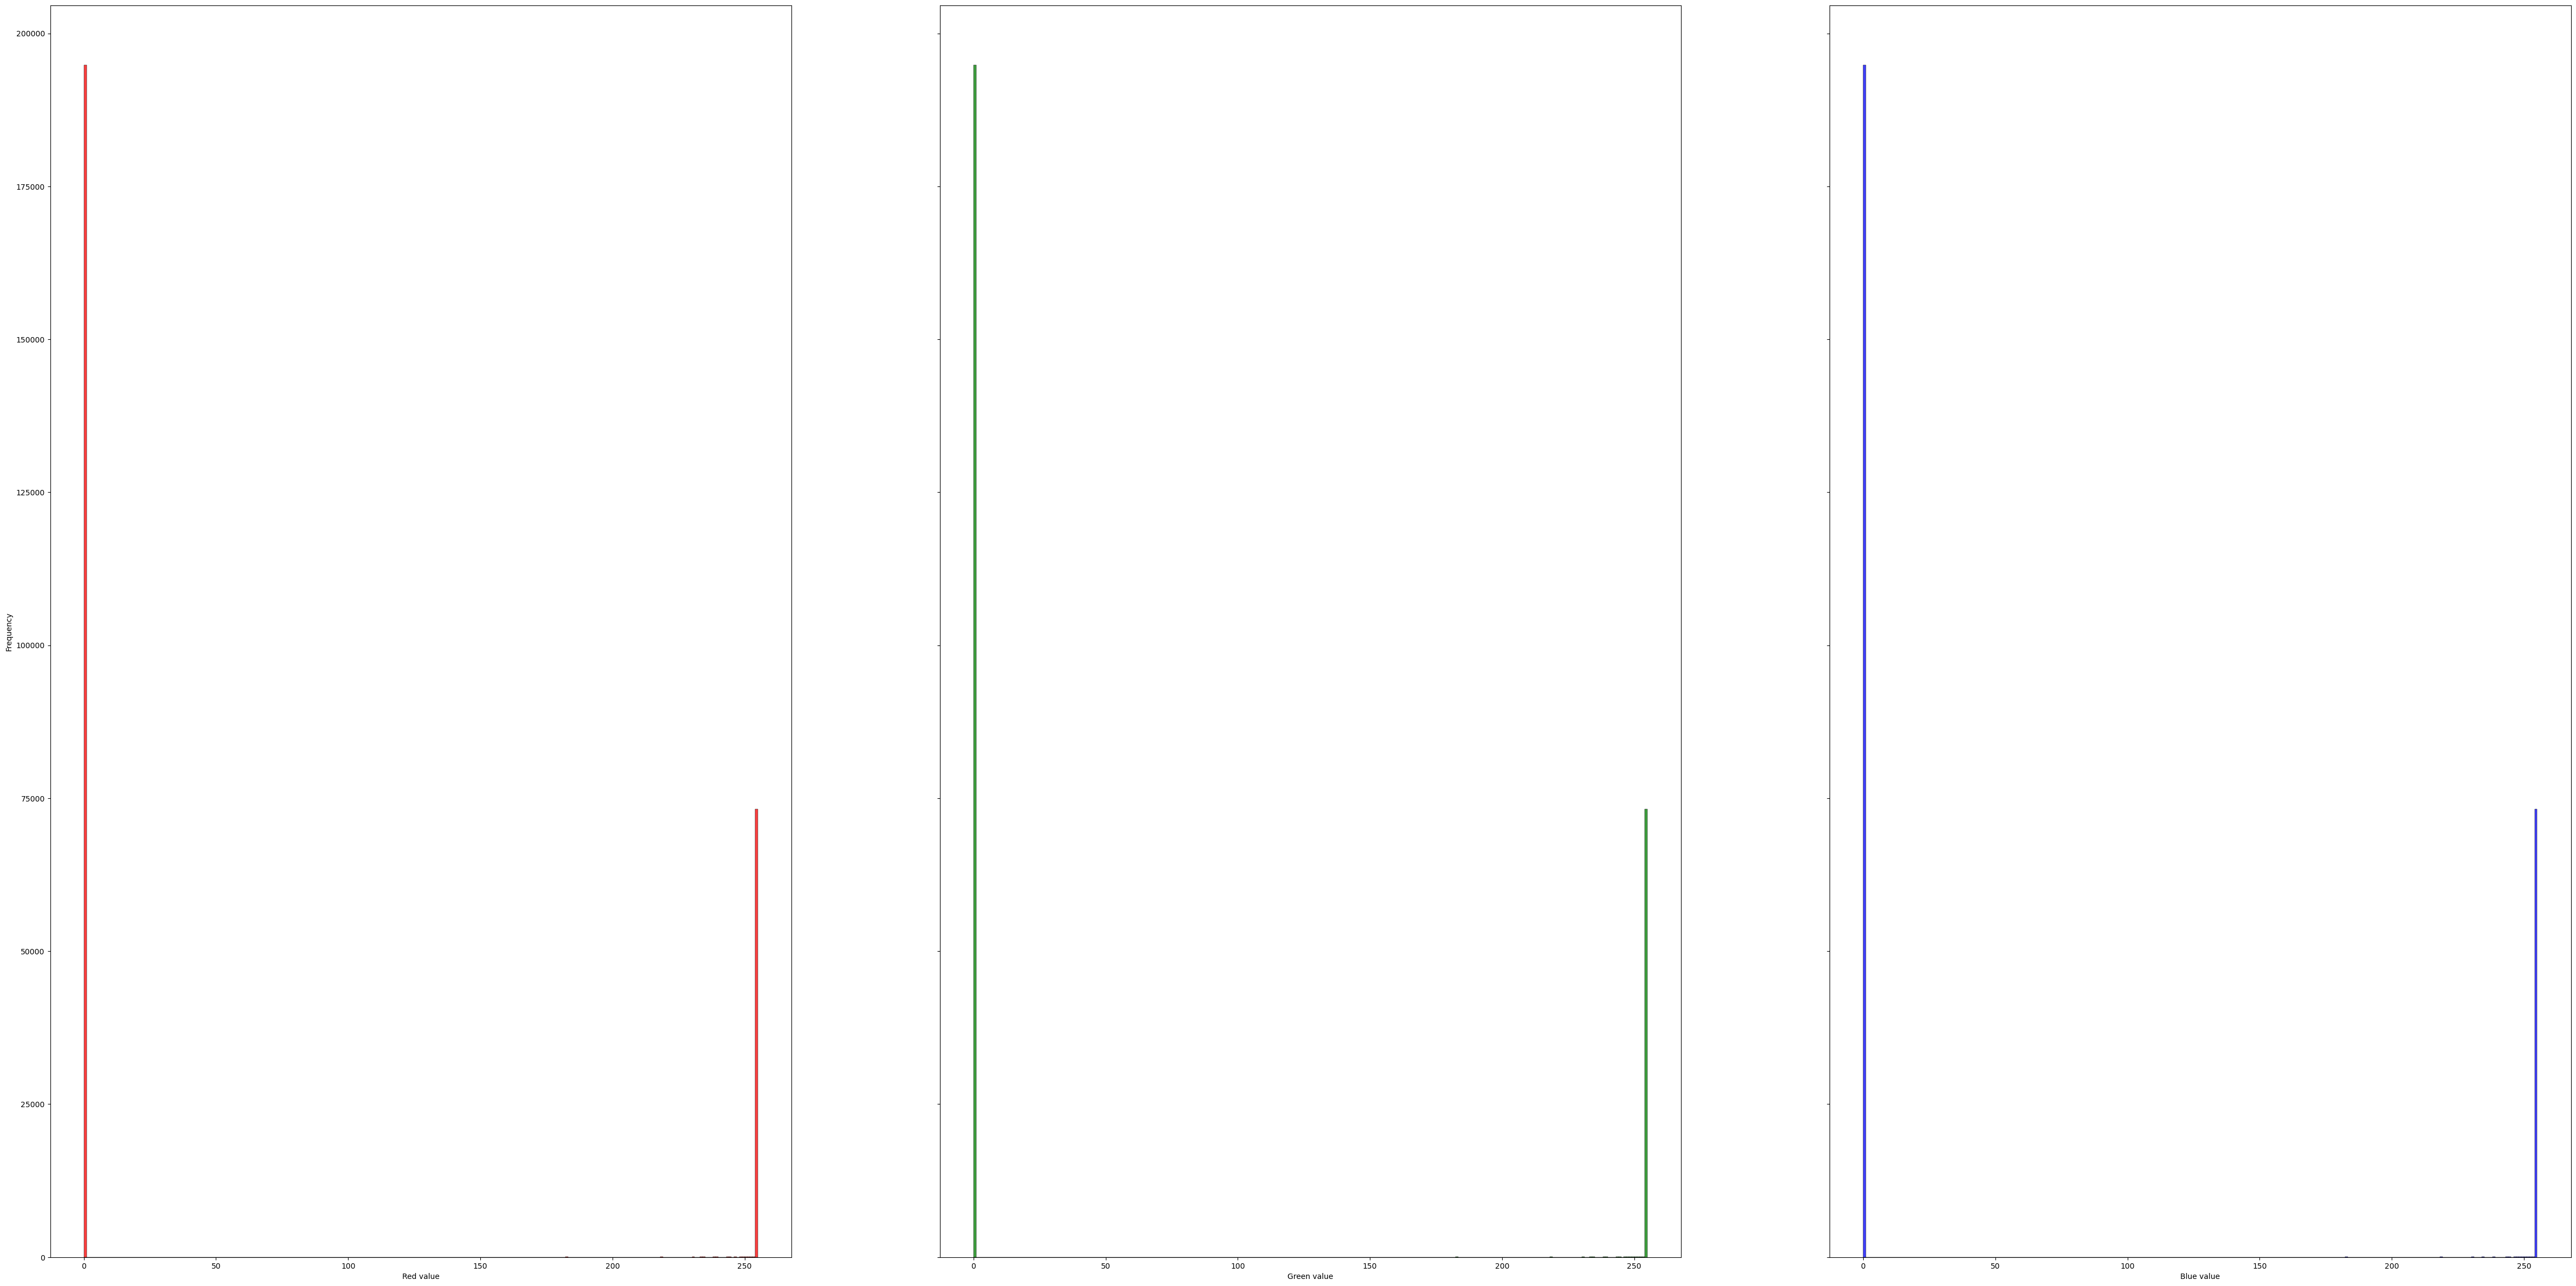

In [5]:
mask = cv2.imread("Images/mask-35.png")
mask = mask[:,:,::-1]

m_red ,m_green ,m_blue  = cv2.split(mask)

red_hist =  m_red.flatten()
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(60,30), sharex=True, sharey=True)
plt.subplot(1,3,1)
sns.histplot( red_hist, bins=256, kde=False,color='red')
plt.xlabel("Red value")
plt.ylabel("Frequency")

green_hist =  m_green.flatten()

plt.subplot(1,3,2)
sns.histplot( green_hist, bins=256, kde=False,color='green')
plt.xlabel("Green value")
plt.ylabel("Frequency")

blue_hist =  m_blue.flatten()

plt.subplot(1,3,3)
sns.histplot( blue_hist, bins=256, kde=False,color='blue')
plt.xlabel("Blue value")
plt.ylabel("Frequency")
plt.show()

# 14 histogram for grayscale img

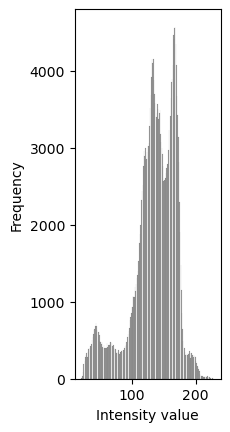

In [6]:
gray_hist =  gray_img.flatten()

plt.subplot(1,3,3)
sns.histplot( gray_hist, bins=256, kde=False,color='gray')
plt.xlabel("Intensity value")
plt.ylabel("Frequency")
plt.show()

# 15 HSV hist

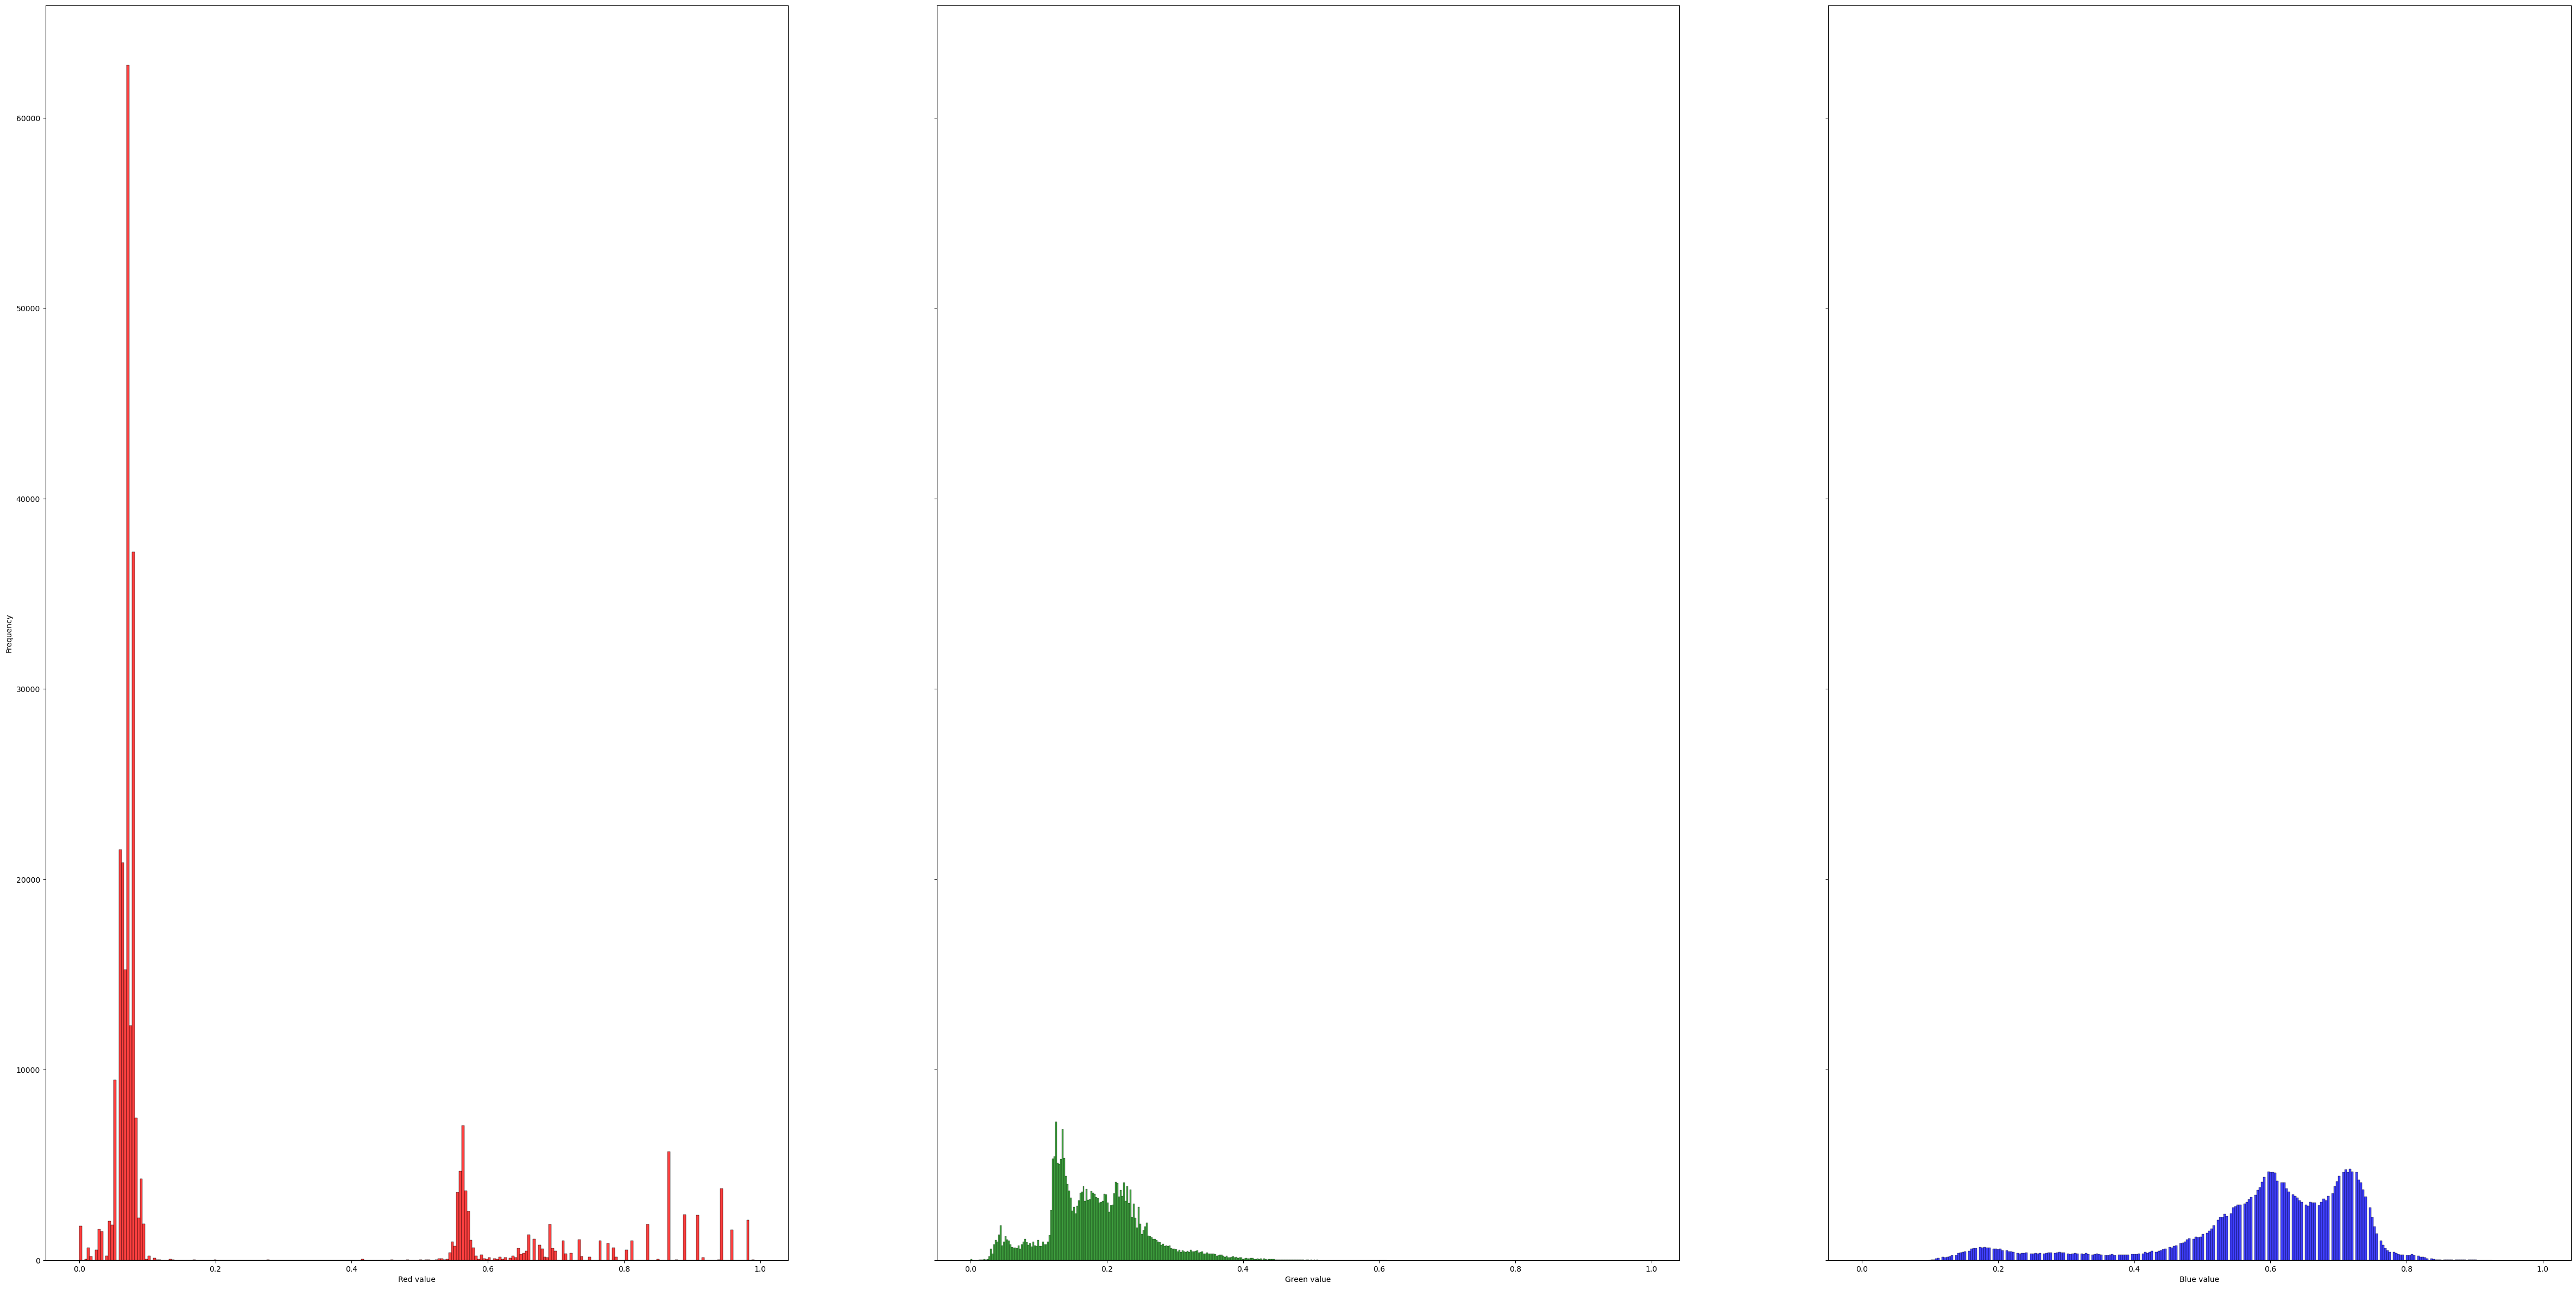

In [7]:
hsvimage = skimage.color.rgb2hsv(img)

red_hsv, green_hsv, blue_hsv = cv2.split(hsvimage)

red_hist =  red_hsv.flatten()
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(60,30), sharex=True, sharey=True)
plt.subplot(1,3,1)
sns.histplot( red_hist, bins=256, kde=False,color='red')
plt.xlabel("Red value")
plt.ylabel("Frequency")

green_hist =  green_hsv.flatten()

plt.subplot(1,3,2)
sns.histplot( green_hist, bins=256, kde=False,color='green')
plt.xlabel("Green value")
plt.ylabel("Frequency")

blue_hist =  blue_hsv.flatten()

plt.subplot(1,3,3)
sns.histplot( blue_hist, bins=256, kde=False,color='blue')
plt.xlabel("Blue value")
plt.ylabel("Frequency")
plt.show()

# 16 Kernel Density replot

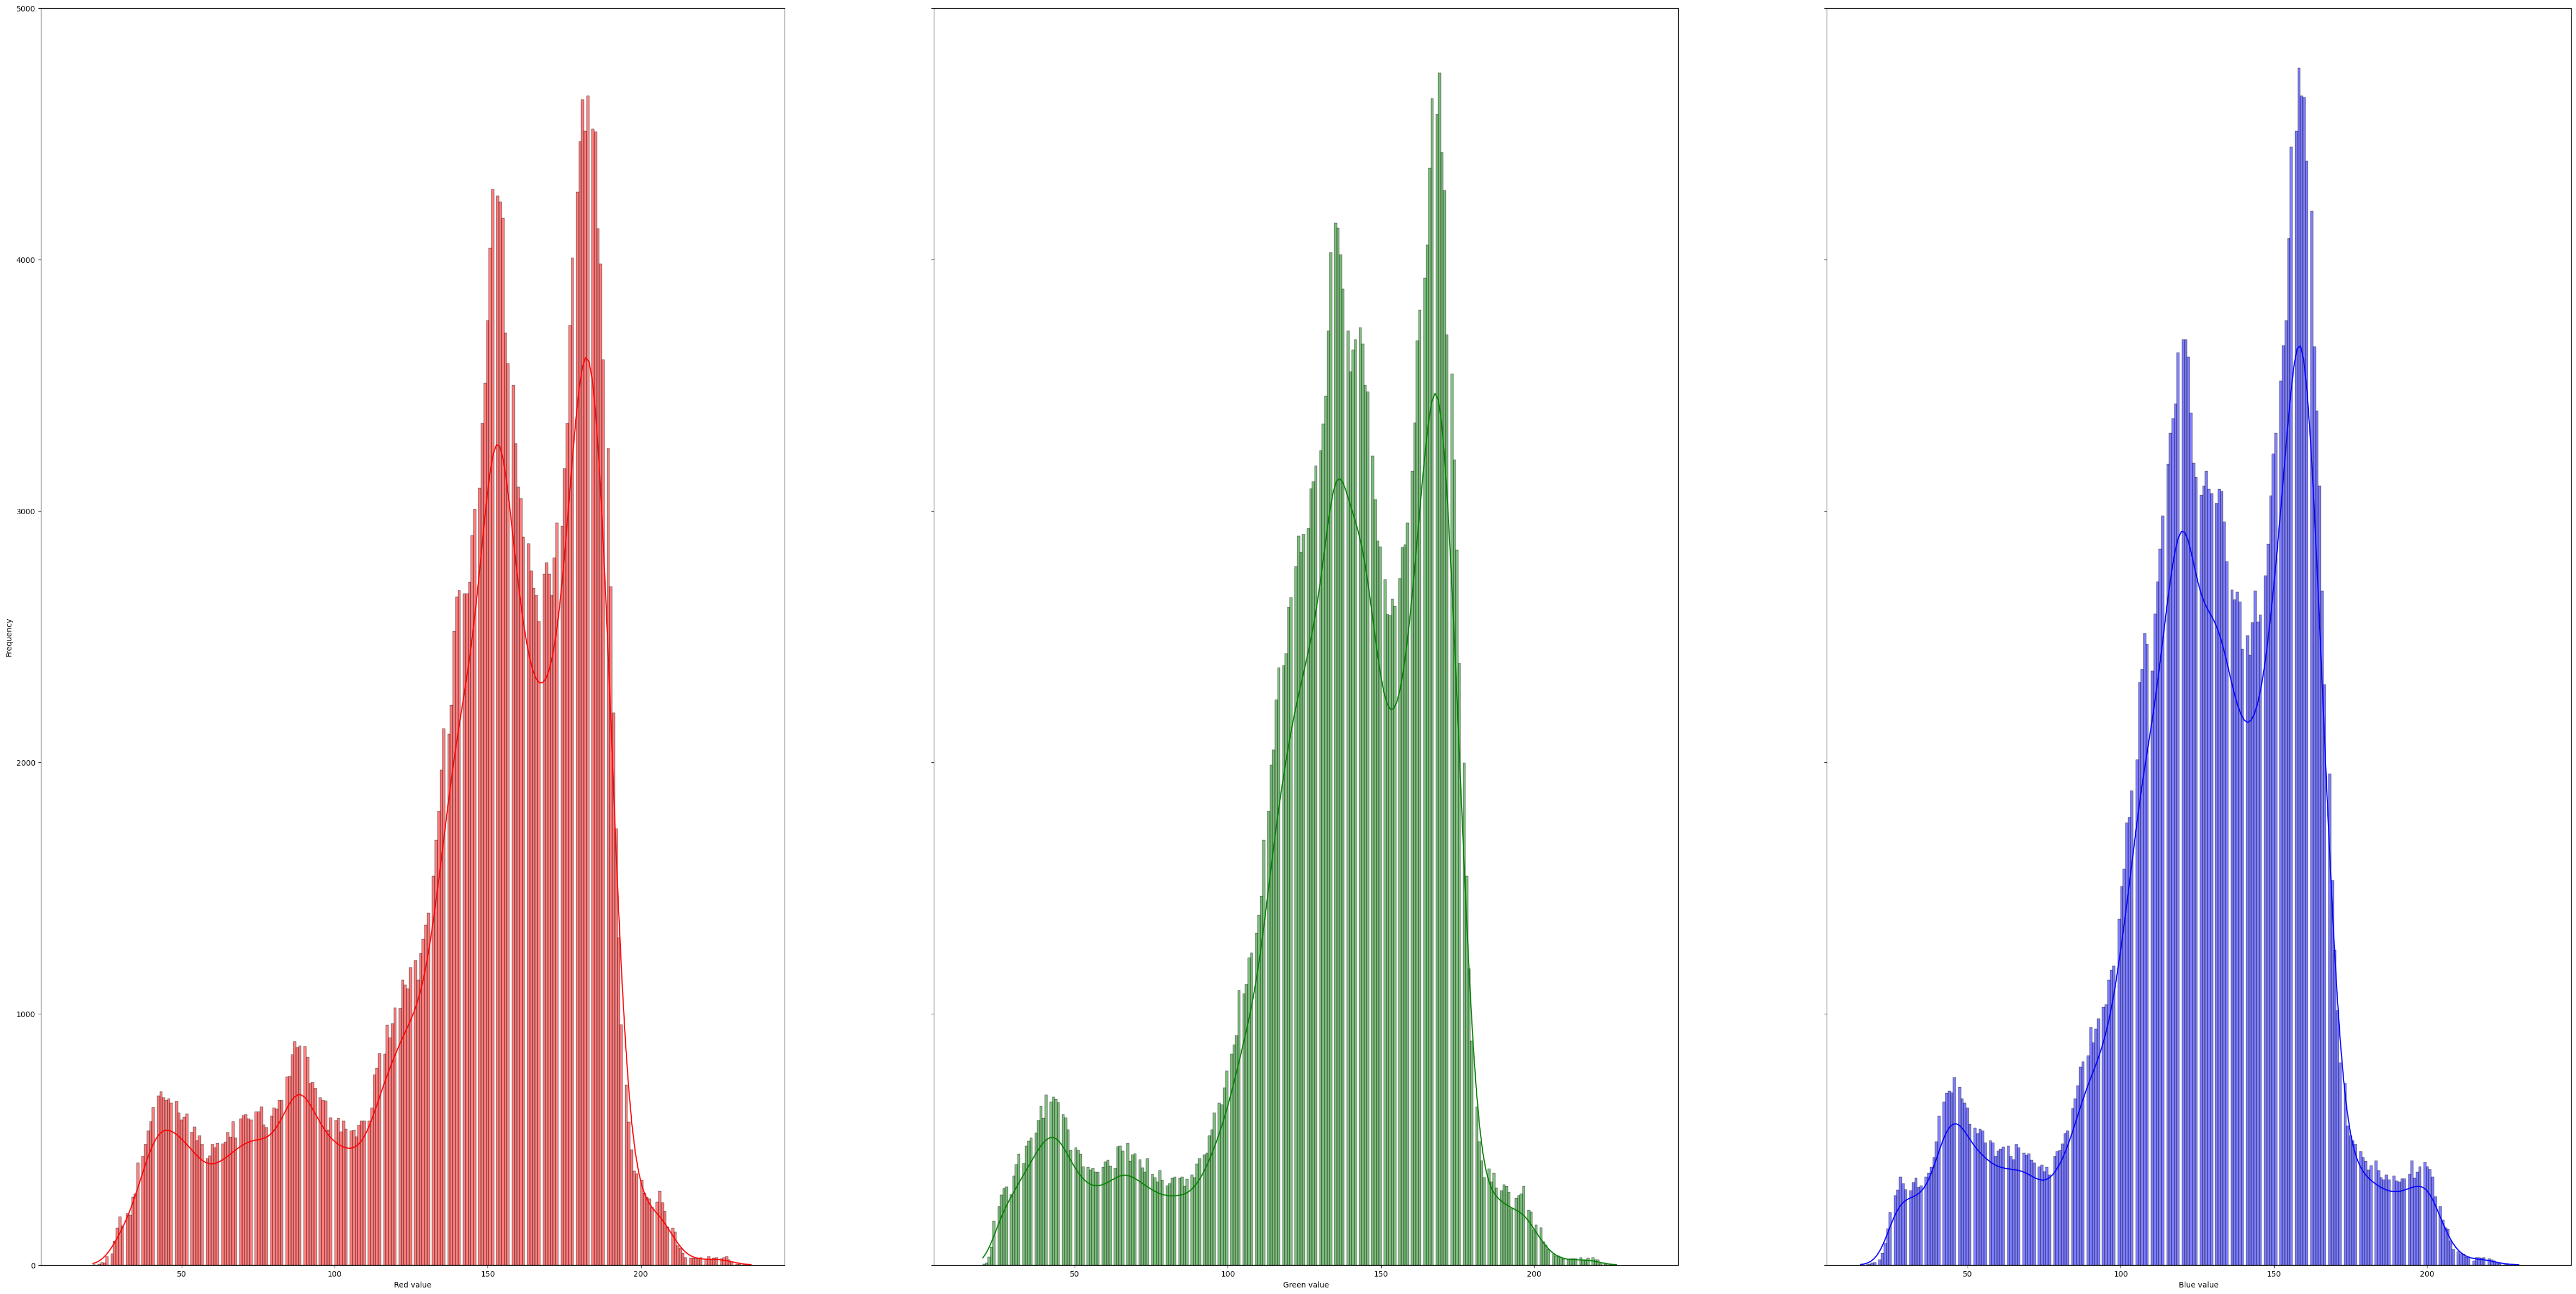

In [8]:
red_hist =  red.flatten()
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(60,30), sharex=True, sharey=True)
plt.subplot(1,3,1)
sns.histplot( red_hist, bins=256, kde=True,color='red')
plt.xlabel("Red value")
plt.ylabel("Frequency")

green_hist =  green.flatten()

plt.subplot(1,3,2)
sns.histplot( green_hist, bins=256, kde=True,color='green')
plt.xlabel("Green value")
plt.ylabel("Frequency")

blue_hist =  blue.flatten()

plt.subplot(1,3,3)
sns.histplot( blue_hist, bins=256, kde=True,color='blue')
plt.xlabel("Blue value")
plt.ylabel("Frequency")
plt.show()

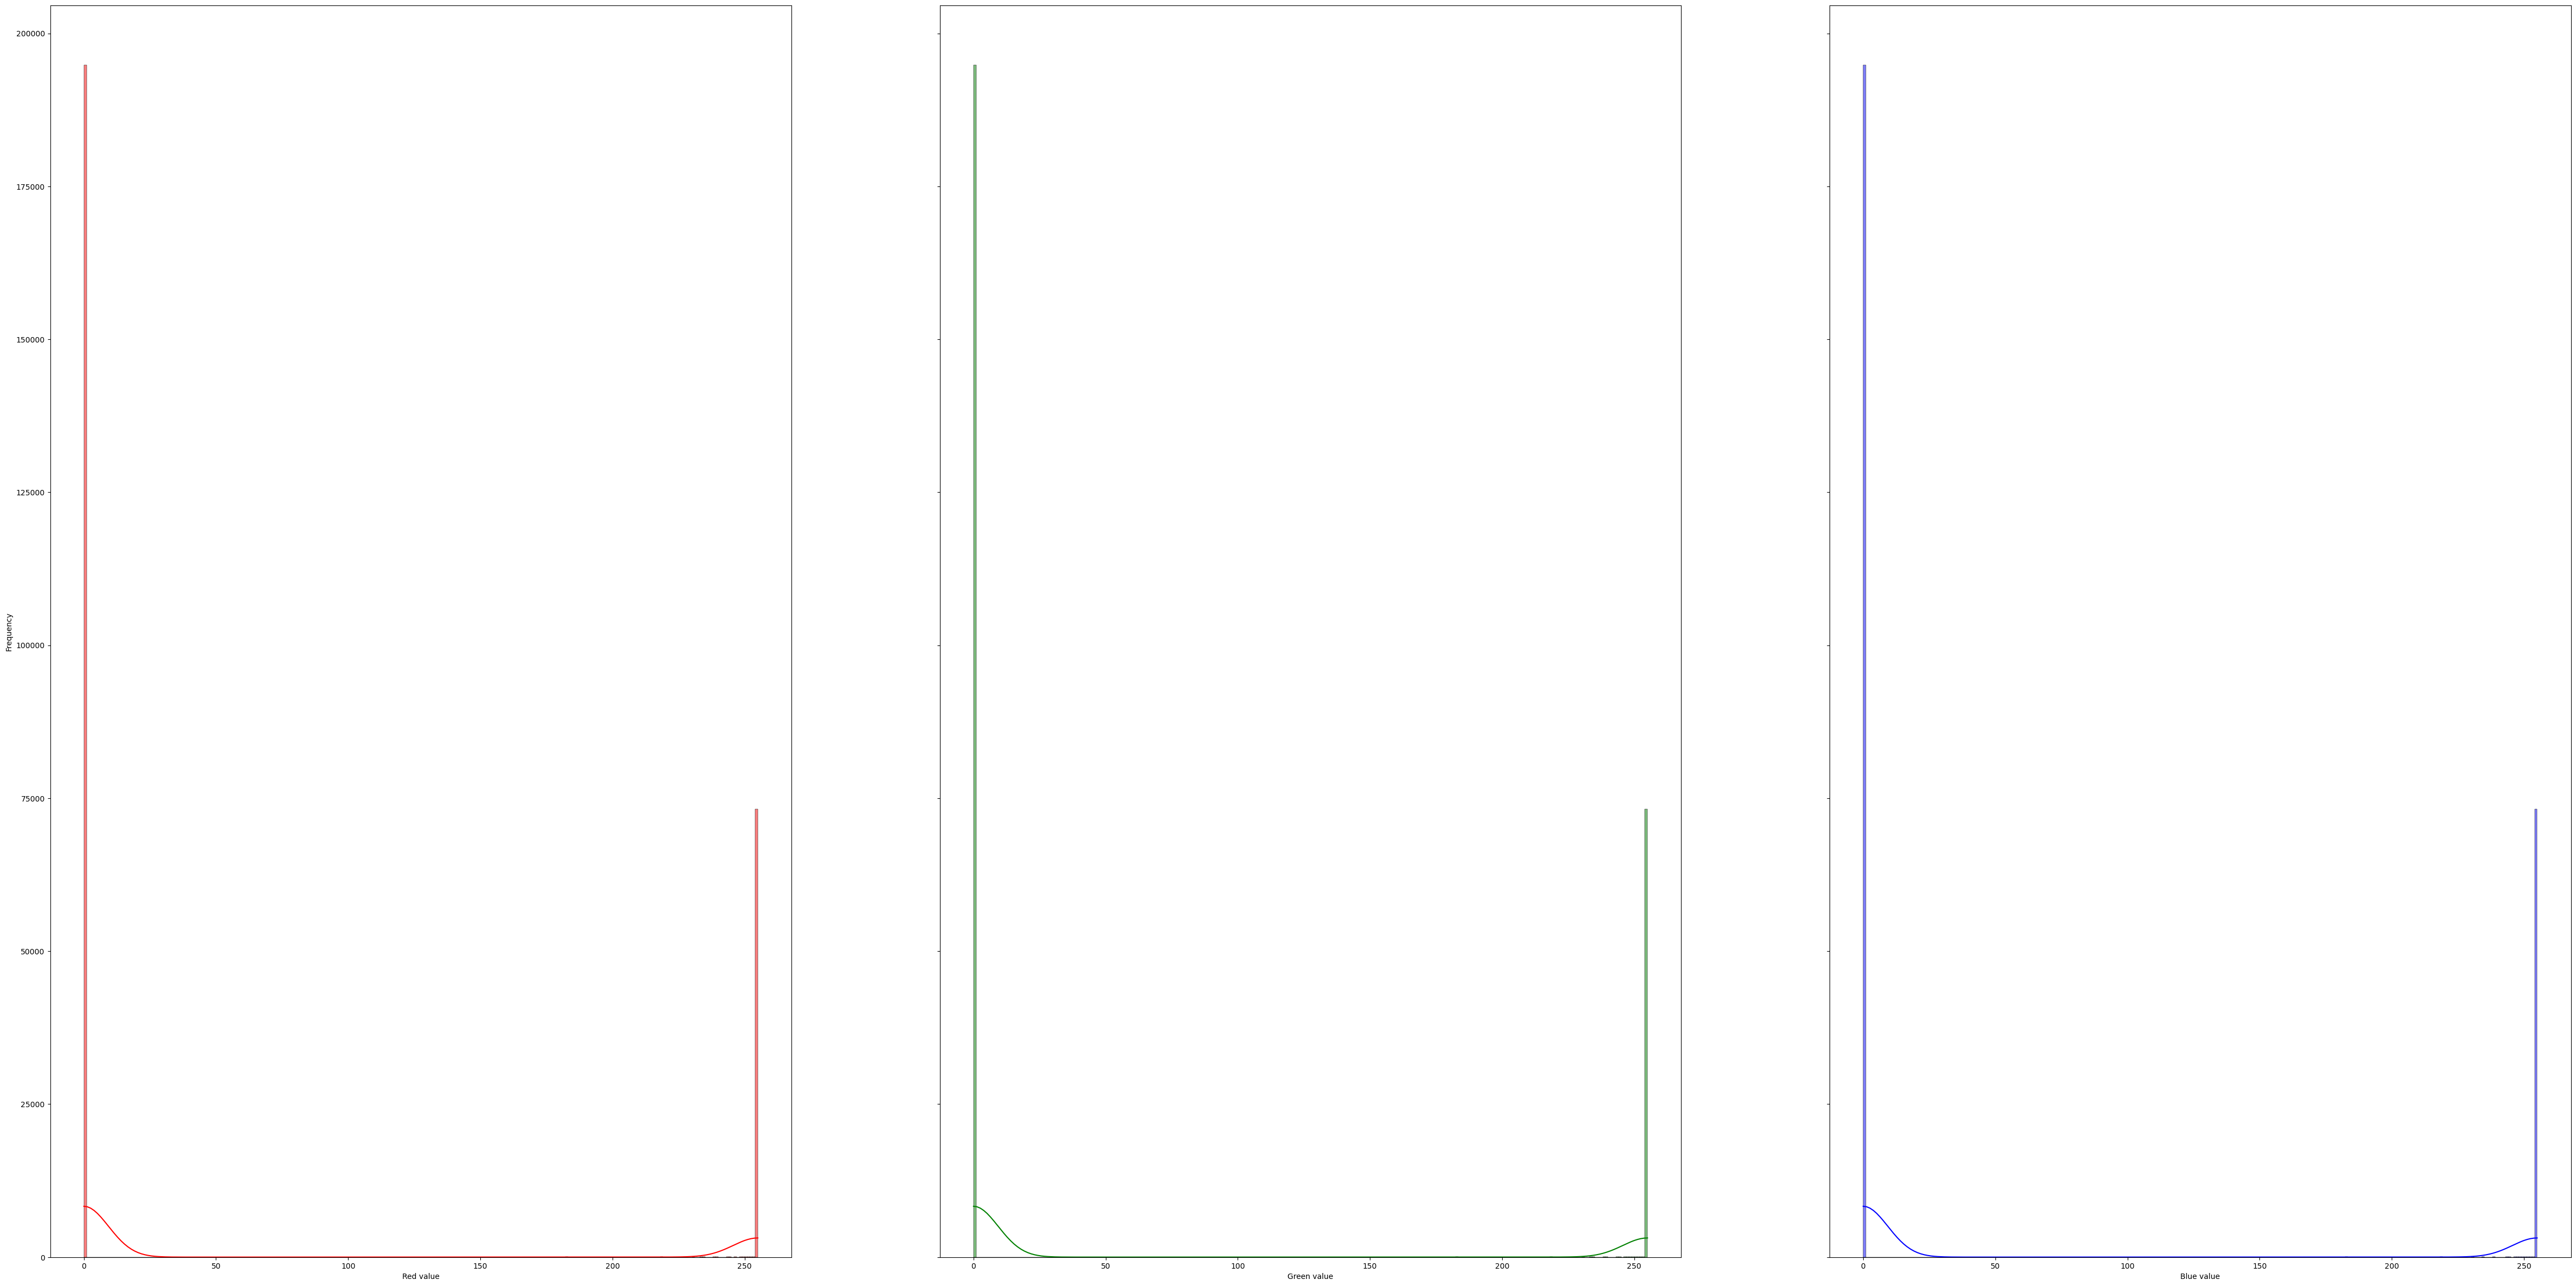

In [9]:
red_hist =  m_red.flatten()
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(60,30), sharex=True, sharey=True)
plt.subplot(1,3,1)
sns.histplot( red_hist, bins=256, kde=True,color='red')
plt.xlabel("Red value")
plt.ylabel("Frequency")

green_hist =  m_green.flatten()

plt.subplot(1,3,2)
sns.histplot( green_hist, bins=256, kde=True,color='green')
plt.xlabel("Green value")
plt.ylabel("Frequency")

blue_hist =  m_blue.flatten()

plt.subplot(1,3,3)
sns.histplot( blue_hist, bins=256, kde=True,color='blue')
plt.xlabel("Blue value")
plt.ylabel("Frequency")
plt.show()

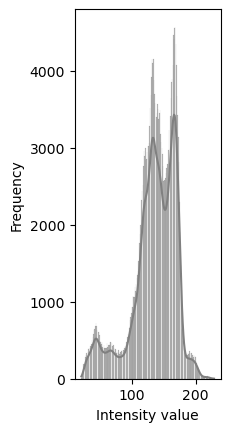

In [10]:
gray_hist =  gray_img.flatten()

plt.subplot(1,3,3)
sns.histplot( gray_hist, bins=256, kde=True,color='gray')
plt.xlabel("Intensity value")
plt.ylabel("Frequency")
plt.show()

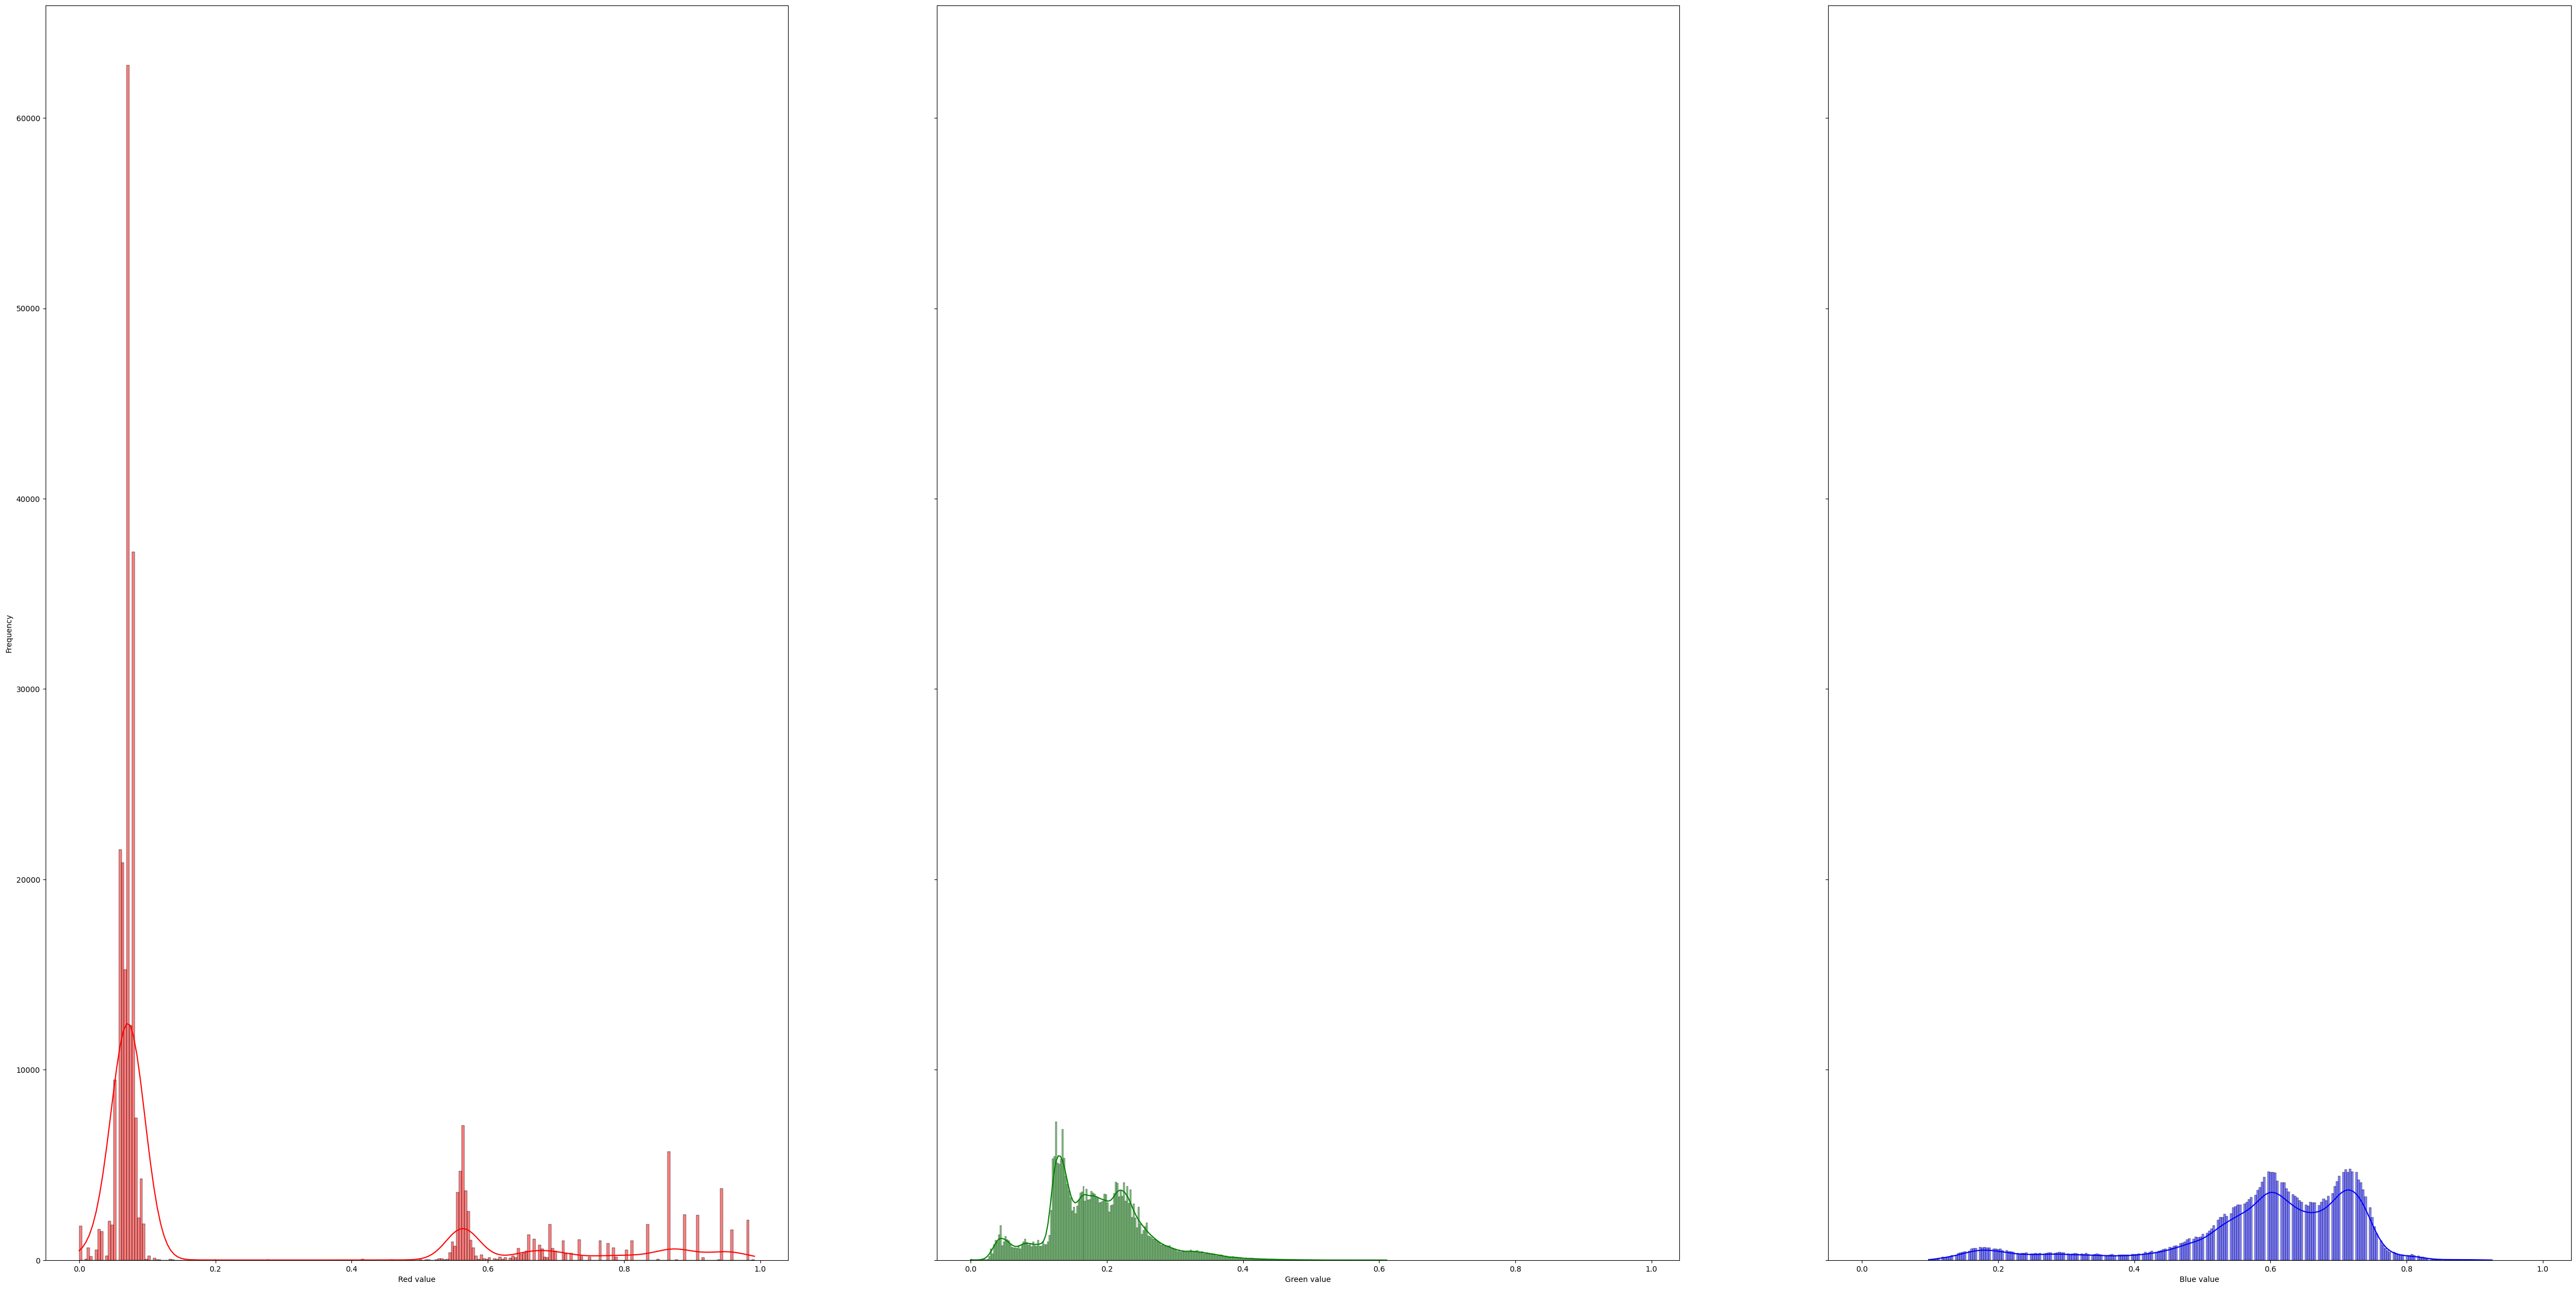

In [11]:
red_hist =  red_hsv.flatten()
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(60,30), sharex=True, sharey=True)
plt.subplot(1,3,1)
sns.histplot( red_hist, bins=256, kde=True,color='red')
plt.xlabel("Red value")
plt.ylabel("Frequency")

green_hist =  green_hsv.flatten()

plt.subplot(1,3,2)
sns.histplot( green_hist, bins=256, kde=True,color='green')
plt.xlabel("Green value")
plt.ylabel("Frequency")

blue_hist =  blue_hsv.flatten()

plt.subplot(1,3,3)
sns.histplot( blue_hist, bins=256, kde=True,color='blue')
plt.xlabel("Blue value")
plt.ylabel("Frequency")
plt.show()

# 5 BackGround classifier

#### NOTE: cast to `float32` before further processing

# 1 custom convolve and 
# 2
#### note on outputs : convolve applied separately but image RGB channels are merged on display

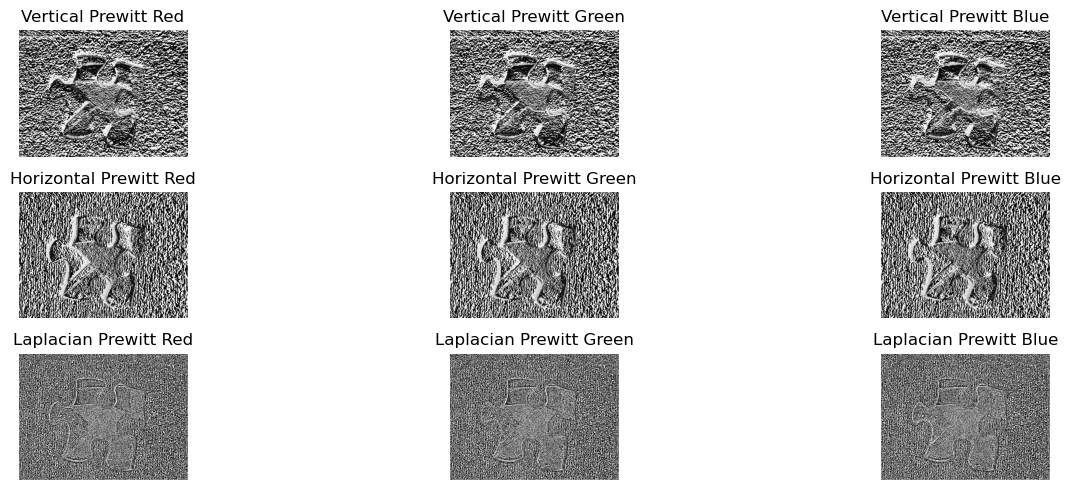

In [12]:
# 1
# construct custom filter

def custom_filter(size):
    return np.ones((size,size))

def convolve_filter(image,filter:np.array):
    # Pad the image
    size = len(filter)
    padding_size = size//2
    padded_image = np.pad(image, pad_width=padding_size, mode='constant', constant_values=0)
    # flip the filter
    flipped_filter = np.flipud(np.fliplr(filter))
    # convolution
    
    return_image = np.zeros_like(image)
    #iterate over the padded image
    for x in range(len(image)):
        for y in range(len(image[0])):
            
            region = padded_image[
                x:x+size,
                y:y+size
                ]
            
            conv_value = np.sum(region * flipped_filter)
            return_image[x,y] = conv_value
    return return_image       
        
def convolve_rgb(image,filter):
    # this code splits the image into each channel, convolves then merges the channels
    red, green, blue = cv2.split(image)          
    red = convolve_filter(red,filter)
    green = convolve_filter(green,filter)
    blue = convolve_filter(blue,filter)
    # rgb_image = cv2.merge([red,green,blue])
    return [red, green, blue]

vertical_prewitt = np.array([
    [1,1,1],
    [0,0,0],
    [-1,-1,-1]
])
horizontal_prewitt = np.array([
    [1,0,-1],
    [1,0,-1],
    [1,0,-1]
])

laplacian = np.array([
    [0,-1,0],
    [-1,4,-1],
    [0,-1,0]
])

image = cv2.imread("Images/image-83.jpg")

# Calculate convolved images

resultant_vert_prewitt = convolve_rgb(image,vertical_prewitt)
resultant_horz_prewitt = convolve_rgb(image,horizontal_prewitt)
resultant_laplacian = convolve_rgb(image,laplacian)
# display images
fig, axes = plt.subplots(3, 3, figsize=(15, 5), sharex=True, sharey=True)

plt.subplot(3,3,1), plt.imshow(resultant_vert_prewitt[0], cmap="gray"), plt.axis("off"), plt.title("Vertical Prewitt Red")
plt.subplot(3,3,2), plt.imshow(resultant_vert_prewitt[1], cmap="gray"), plt.axis("off"), plt.title("Vertical Prewitt Green")
plt.subplot(3,3,3), plt.imshow(resultant_vert_prewitt[2], cmap="gray"), plt.axis("off"), plt.title("Vertical Prewitt Blue")

plt.subplot(3,3,4), plt.imshow(resultant_horz_prewitt[0], cmap="gray"), plt.axis("off"), plt.title("Horizontal Prewitt Red")
plt.subplot(3,3,5), plt.imshow(resultant_horz_prewitt[1], cmap="gray"), plt.axis("off"), plt.title("Horizontal Prewitt Green")
plt.subplot(3,3,6), plt.imshow(resultant_horz_prewitt[2], cmap="gray"), plt.axis("off"), plt.title("Horizontal Prewitt Blue")

plt.subplot(3,3,7), plt.imshow(resultant_laplacian[0], cmap="gray"), plt.axis("off"), plt.title("Laplacian Prewitt Red")
plt.subplot(3,3,8), plt.imshow(resultant_laplacian[1], cmap="gray"), plt.axis("off"), plt.title("Laplacian Prewitt Green")
plt.subplot(3,3,9), plt.imshow(resultant_laplacian[2], cmap="gray"), plt.axis("off"), plt.title("Laplacian Prewitt Blue")
plt.tight_layout()
plt.show()

#3 
## NOTE refer to question 4 to see the outputs of question 2
- From the documentation it shows that the filter2D function does not execute convolution, it actually does cross-correlation
- Comparing Our Convolution of the prewitt and laplacian to the built in `cv2.filter2D`, our version is grainer and doesn't pick up edges as well

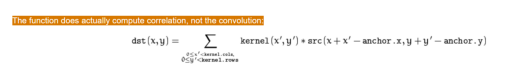

In [13]:

image = cv2.imread("Images/Documentation.png")
plt.figure()
plt.axis("off"), plt.imshow(image)
plt.show()

In [14]:
#from skimage.io import imread, imshow

from skimage.filters import prewitt_v, prewitt_h, laplace, sobel,  prewitt
import cv2
# recalculating the prewitt and laplapcian to be use in this question.
# Using RGB formatting
original = cv2.imread("Images/image-35.jpg")
null = np.ones_like(original)
mask = cv2.imread("Images/mask-35.png", cv2.IMREAD_GRAYSCALE)
null = np.ones_like(mask)*255
inverse_mask = 255-mask 


In [15]:

def getFeatures(training_img, mask, show_plot=True):
    binary_mask = mask>128
    #plt.imshow(binary_mask)
    
    #add dimensions
    # print(binary_mask.shape)
    hsv_training_img = cv2.cvtColor(training_img, cv2.COLOR_BGR2RGB)
    v,s,h = cv2.split(hsv_training_img)
    h, s,v = h*binary_mask, s*binary_mask, v*binary_mask
    # print(h.shape)
    b,g,r = cv2.split(training_img)
    r,g,b = r*binary_mask, g*binary_mask, b*binary_mask


    # get vertical prewitt for separated channels

    vert_prewitt_r = cv2.filter2D(src=r, ddepth=-1, kernel=vertical_prewitt)
    vert_prewitt_g = cv2.filter2D(src=g, ddepth=-1, kernel=vertical_prewitt)
    vert_prewitt_b = cv2.filter2D(src=b, ddepth=-1, kernel=vertical_prewitt)
    # get horizontal prewitt for separated channels

    hori_prewitt_r = cv2.filter2D(src=r, ddepth=-1, kernel=horizontal_prewitt)
    hori_prewitt_g = cv2.filter2D(src=g, ddepth=-1, kernel=horizontal_prewitt)
    hori_prewitt_b = cv2.filter2D(src=b, ddepth=-1, kernel=horizontal_prewitt)
    # get Laplacian for separated channels

    laplace_r = cv2.filter2D(src=r, ddepth=-1, kernel=laplacian)
    laplace_g = cv2.filter2D(src=g, ddepth=-1, kernel=laplacian)
    laplace_b = cv2.filter2D(src=b, ddepth=-1, kernel=laplacian)

    if show_plot:
        # vertical prewitt plot 
        fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(16,4))
        plt.subplot(1,3,1), plt.imshow( vert_prewitt_r,cmap="gray"), plt.axis("off")
        plt.subplot(1,3,2), plt.imshow( vert_prewitt_g,cmap="gray"), plt.axis("off")
        plt.subplot(1,3,3), plt.imshow( vert_prewitt_b,cmap="gray"), plt.axis("off")
        plt.suptitle("Vertical Prewitt of RGB image")
        plt.show()

        # horizontal prewitt plot
        fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(16,4))
        plt.subplot(1,3,1), plt.imshow( hori_prewitt_r,cmap="gray"), plt.axis("off")
        plt.subplot(1,3,2), plt.imshow( hori_prewitt_g,cmap="gray"), plt.axis("off")
        plt.subplot(1,3,3), plt.imshow( hori_prewitt_b,cmap="gray"), plt.axis("off")
        plt.suptitle("Horizontal Prewitt of RGB image")
        plt.show()

        # laplace plot
        fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(16,4))
        plt.subplot(1,3,1), plt.imshow( laplace_r,cmap="gray"), plt.axis("off")
        plt.subplot(1,3,2), plt.imshow( laplace_g,cmap="gray"), plt.axis("off")
        plt.subplot(1,3,3), plt.imshow( laplace_b,cmap="gray"), plt.axis("off")
        plt.suptitle("Laplacian of RGB image")
        plt.show()

    features = [
        vert_prewitt_r, hori_prewitt_r,
        vert_prewitt_g, hori_prewitt_g,
        vert_prewitt_b, hori_prewitt_b,
        laplace_r, laplace_g, laplace_b,
        r, g, b,
        h, s, v
    ]

    flattened_features = np.array([f[binary_mask].flatten() for f in features])
    # print(flattened_features[0].shape)

    return np.array(flattened_features)

# 4 Getting the mean and cov over the features

1. First extract the features

Filters applied to training image


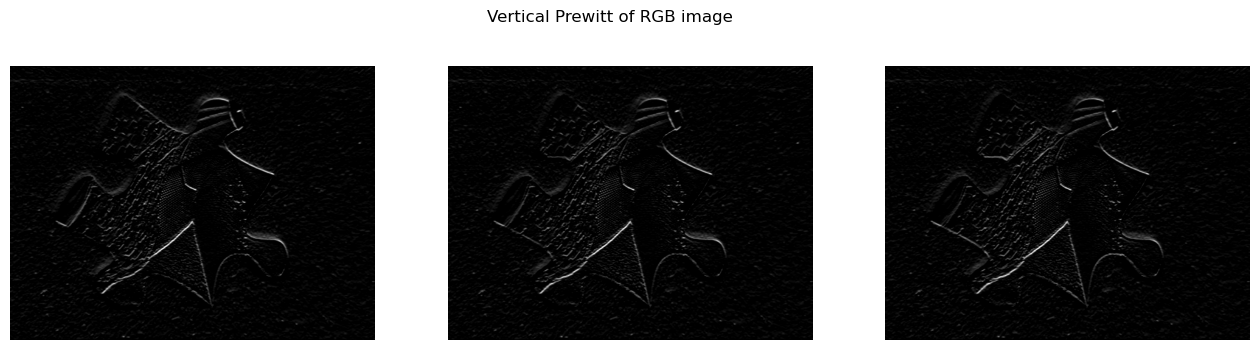

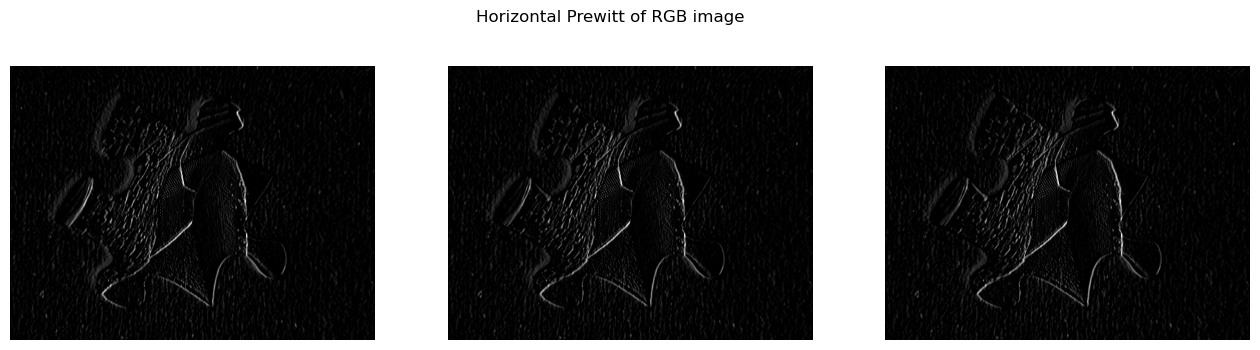

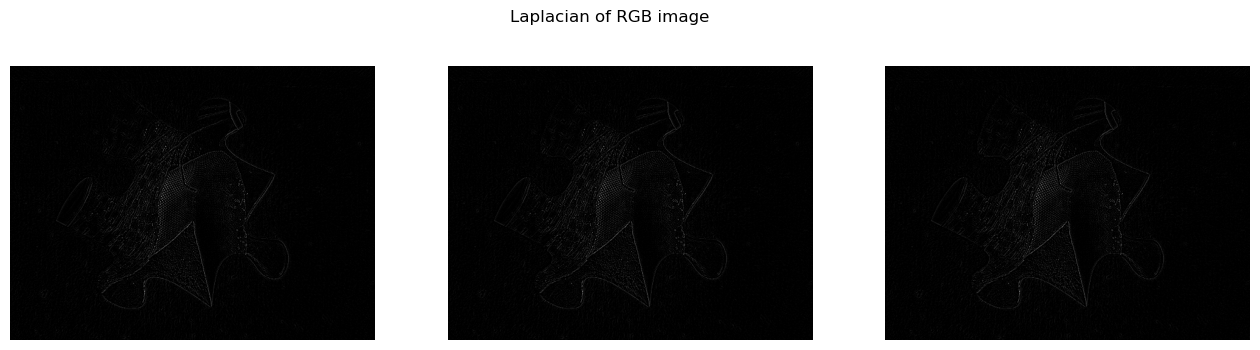

In [34]:
#plt.imshow(mask)
#plt.imshow(inverse_mask)
#print((mask+inverse_mask))
#original = cv2.imread("Images/image-35.jpg")
# get the feature for fg and bg
print("Filters applied to training image")
original_features = getFeatures(original, null, show_plot=True)
# print(original_features[0].shape)

fg_features = getFeatures(original, mask, show_plot=False)
# print(fg_features[0].shape)
bg_features = getFeatures(original, inverse_mask, show_plot=False)
# print(bg_features[0].shape)

Mean and covariance matrix


In [35]:

#make each feature a row in the matrix
original_feature_matrix = np.stack(original_features, axis=-1)
# print(original_feature.shape)
# original_mean_vector = np.mean(original_feature_matrix, axis=0)
# original_cov_matrix = np.cov(original_feature_matrix, rowvar=False)
# print(original_mean_vector.shape)
# print(original_cov_matrix.shape)

fg_feature_matrix = np.stack(fg_features, axis=-1)
fg_mean_vector = np.mean(fg_feature_matrix, axis=0)
fg_cov_matrix = np.cov(fg_feature_matrix, rowvar=False)
print("fg mean shape:",fg_mean_vector.shape)
print("fg cov shape:", fg_cov_matrix.shape)
# print(np.sum(fg_mean_vector))


#make each feature a row in the matrix
# print(fg_features.shape)
bg_feature_matrix = np.stack(bg_features, axis=-1)
bg_mean_vector = np.mean(bg_feature_matrix, axis=0)
bg_cov_matrix = np.cov(bg_feature_matrix, rowvar=False)
print("bg mean shape:",bg_mean_vector.shape)
print("bg cov shape",bg_cov_matrix.shape)

fg mean shape: (15,)
fg cov shape: (15, 15)
bg mean shape: (15,)
bg cov shape (15, 15)


3. Setting up the Bayes Classifier, using the foreground and background mean and cov


In [36]:
# definition of Bayes rule
from scipy.stats import multivariate_normal
N = original.shape[0]*original.shape[1]
unchanged_mask = cv2.imread("Images/mask-35.png", cv2.IMREAD_GRAYSCALE).astype(np.float32) >0.5
N_fg = np.sum(unchanged_mask)
N_bg = N - N_fg

def foreground_given_pixel(x,fg_mean, fg_cov, bg_mean, bg_cov):
    numerator = multivariate_normal.pdf( x, mean = fg_mean, cov= fg_cov, allow_singular=True) * (N_fg)
    denominator = multivariate_normal.pdf(x, mean=fg_mean, cov=fg_cov, allow_singular=True)*N_fg \
                + multivariate_normal.pdf( x, mean= bg_mean, cov= bg_cov, allow_singular=True) * (N_bg)
    probability = numerator/denominator
    return probability


**Gets the features corresponding to a single pixel**

In [37]:
def getPixelFeatures(features,row, col):
    pixel_coordinate = row*600 + col
    pixel_features= []
    for f in features:
        pixel_features.append(f[pixel_coordinate])
    return pixel_features

# Question 5 on the validation image

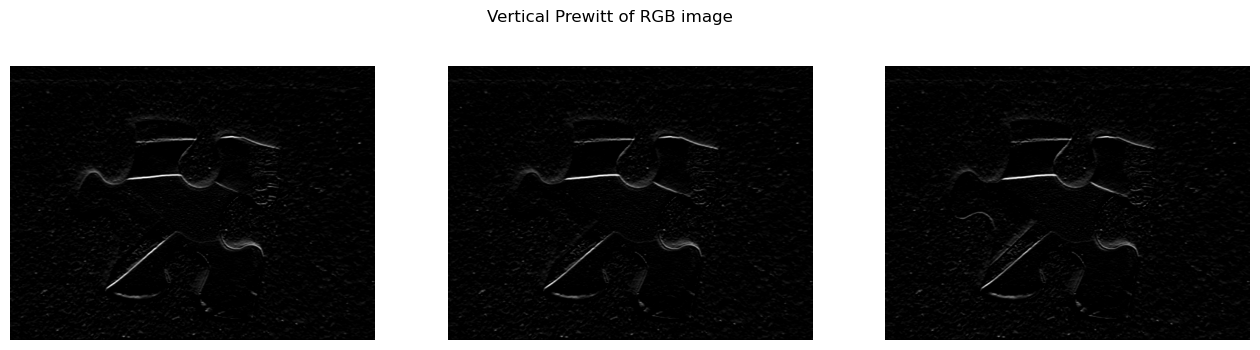

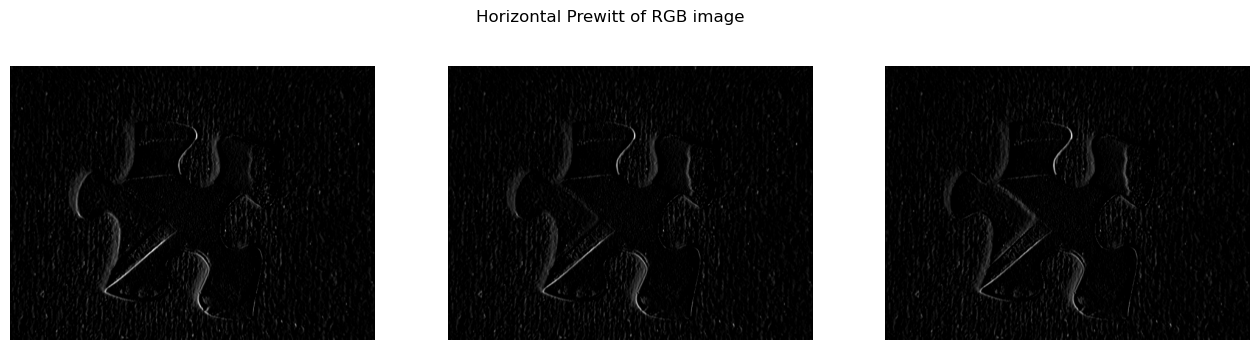

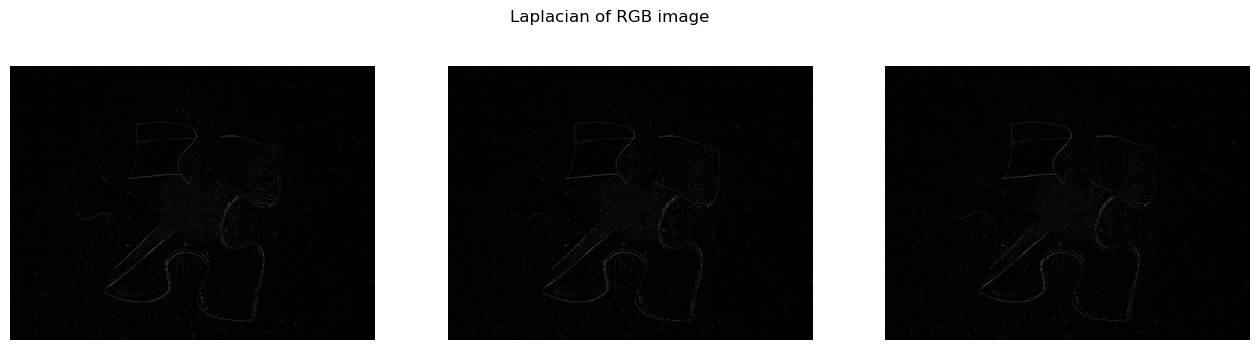

In [38]:
validation_img = cv2.imread("Images/image-83.jpg")
# this is only used for the accuracy measure since it represents the foreground
# use null mask since we want to classify evey pixel in the validation image
validation_features  = getFeatures(validation_img, null, show_plot=True)

# pixel = getPixelFeatures(validation_features, row = 5, col=70)
# test = foreground_given_pixel(pixel, fg_mean_vector, fg_cov_matrix, bg_mean_vector, bg_cov_matrix)

# print(test)

# Classifying every pixel in the validation image, based on the parameters from training image.
## regen image based on the predictions to see if its right

In [39]:
# doing the features all at once instead
def vectorized_prediction(validation_features, fg_mean_vector,fg_cov_matrix,bg_mean_vector,bg_cov_matrix):
    #transpose to make each column a feature vector for a pixel
    reshaped_features = validation_features.T
    #vector of predictions
    probabilities = foreground_given_pixel(reshaped_features, fg_mean_vector, fg_cov_matrix, bg_mean_vector, bg_cov_matrix)
    #shape back to image
    height, width = 450, 600
    predictions_reshaped = probabilities.reshape(height, width)
    
    return predictions_reshaped

In [40]:
verify_img = np.zeros_like(mask)
print(validation_features.shape)


### USING THE VECTORISED APPROACH
verify_img = vectorized_prediction(validation_features, fg_mean_vector, fg_cov_matrix, bg_mean_vector, bg_cov_matrix)

(15, 270000)


/tmp/ipykernel_46063/3974720186.py:12: RuntimeWarning: invalid value encountered in divide
  probability = numerator/denominator


- displaying the prediction made for validation with $\Theta$ = 0.5

(<matplotlib.image.AxesImage at 0x70fee8b00ce0>,
 Text(0.5, 1.0, 'Training image prediction Just to test dont mark it'))

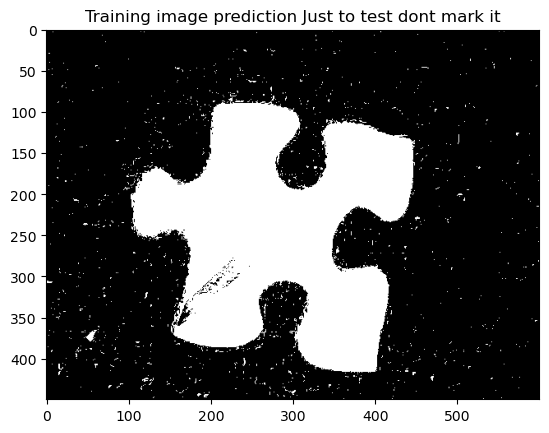

In [54]:
theta = 0.5
thresholded_img = verify_img.copy() > theta
plt.imshow(thresholded_img, cmap="gray"), plt.title("Validation image prediction")

### Accuracy, Precision, recall and F1 score on validation image
set $\Theta$ = {10, 20, 30, 40, 50, 60, 70, 80, 90, 95}

In [56]:
from sklearn.metrics import classification_report
# when theta = 0.8
print(thresholded_img.shape)
### NOTE have to use the img we put through the classifier
### NOTE I am being careless with naming variables
validation_mask = cv2.imread("Images/mask-83.png",cv2.IMREAD_GRAYSCALE) >128
verify_img = thresholded_img.astype(np.uint8).flatten()
validation_mask =(validation_mask).astype(np.uint8).flatten()
print(classification_report(validation_mask, verify_img))

(450, 600)
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    209622
           1       0.89      0.99      0.94     60378

    accuracy                           0.97    270000
   macro avg       0.94      0.98      0.96    270000
weighted avg       0.97      0.97      0.97    270000



# how do these values change?
as we adjust the threshold no noticable change occurs , the fpr and tpr  values tend to be around the same region

### Confusion matrix

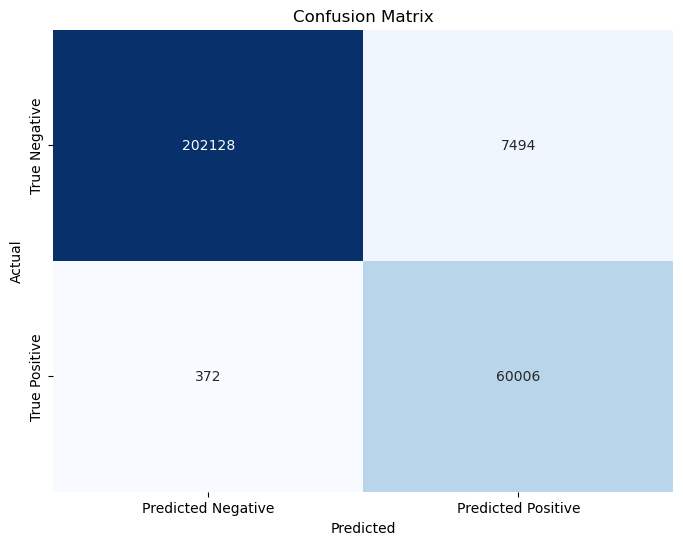

In [43]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(validation_mask, verify_img)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

*NOTE* the ROC curve is a measure of true positive rate against the False positive rate
$$TPR = \frac{TP}{TP+FN}$$
and
$$FPR = \frac{FP}{FP+TN}

In [44]:
def roc(TP, TN, FP, FN):
    TPR = TP/(TP+FN)
    FPR = FP/(FP+TN)

    return FPR, TPR

In [45]:
# print(conf_matrix)

[[202128   7494]
 [   372  60006]]


##### Checking validation image again

In [46]:
# getting FPR, TPR and plotting
from sklearn.metrics import auc
from tqdm import tqdm

# fpr, tpr = roc(conf_matrix[1][1], conf_matrix[0][0], conf_matrix[0][1], conf_matrix[1][0])

verify_img = np.zeros_like(mask)

verify_img = vectorized_prediction(validation_features,fg_mean_vector, fg_cov_matrix, bg_mean_vector, bg_cov_matrix)



/tmp/ipykernel_46063/3974720186.py:12: RuntimeWarning: invalid value encountered in divide
  probability = numerator/denominator


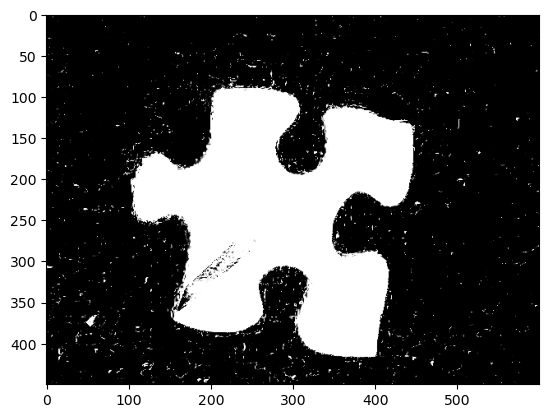

In [53]:
# plt.imshow(verify_img.reshape(450,600), cmap="gray")

# ROC curve

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
========== 0.0
[0.         0.90393357 0.90472127 ... 0.99995077 0.99995077 1.        ]
========== 0.1111111111111111
[0.         0.90393357 0.90472127 ... 0.9952574  0.9952574  1.        ]
========== 0.2222222222222222
[0.         0.90393357 0.90472127 ... 0.99468303 0.99468303 1.        ]
========== 0.3333333333333333
[0.         0.90393357 0.90472127 ... 0.99410867 0.99410867 1.        ]
========== 0.4444444444444444
[0.         0.90393357 0.90472127 ... 0.993682   0.993682   1.        ]
========== 0.5555555555555556
[0.         0.90393357 0.90472127 ... 0.99314046 0.99314046 1.        ]
========== 0.6666666666666666
[0.         0.90393357 0.90472127 ... 0.99243481 0.99246763 1.        ]
========== 0.7777777777777777
[0.         0.90393357 0.90472127 ... 0.99176198 0.99176198 1.        ]
========== 0.8888888888888888
[0.         0.90393357 0.90472127 ... 0.99056403 0.99056

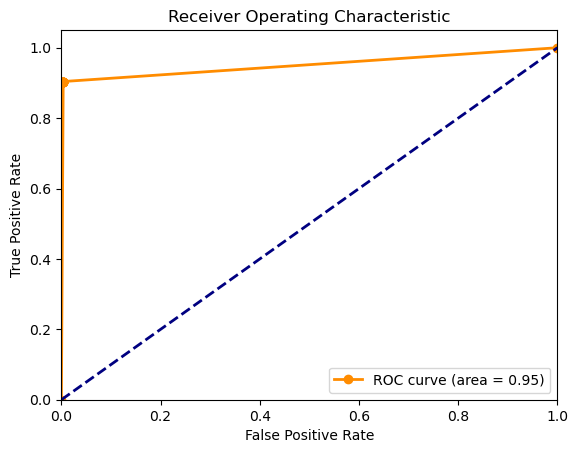

In [48]:
from sklearn.metrics import roc_curve
theta = np.linspace(0.0, 1.0, 10)
print(theta)

validation_mask = cv2.imread("Images/mask-83.png", cv2.IMREAD_GRAYSCALE)
validation_mask  = (validation_mask >0.5).astype(int).flatten()

tpr_values = [0]
fpr_values = [0]

for thresh in theta:
    # Apply threshold to get binary predictions
    thresholded_img = np.where(verify_img > thresh, verify_img, 0).flatten()
    
    # Calculate FPR and TPR
    fpr, tpr, _ = roc_curve(validation_mask, thresholded_img)
    print(10*"=",thresh)
    print(tpr)
    print(10*"=")
    # Store FPR and TPR values
    tpr_values.append(tpr[1])  # True Positive Rate (Recall)
    fpr_values.append(fpr[1])  # False Positive Rate

# Calculate AUC
roc_auc = auc(fpr_values, tpr_values)

# tpr_values = np.array(tpr_values )
# fpr_values = np.array(fpr_values )
plt.figure()
plt.plot(fpr_values, tpr_values, marker='o', color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



#### NOTE area of ROC is on the plot 
AUC= 0.95

In [49]:
print(tpr_values)
print(fpr_values)

[0, 0.9039335707369907, 0.9039335707369907, 0.9039335707369907, 0.9039335707369907, 0.9039335707369907, 0.9039335707369907, 0.9039335707369907, 0.9039335707369907, 0.9039335707369907, 1.0]
[0, 0.003606568354993471, 0.003606568354993471, 0.003606568354993471, 0.003606568354993471, 0.003606568354993471, 0.003606568354993471, 0.003606568354993471, 0.003606568354993471, 0.003606568354993471, 1.0]


# Question 7 IOU

## Intersection over Union over validation image

In [50]:
# I wanted to see if using tn,tp,fp,fn yields a different result. There seems to be a discrepancy

def get_IOU_PosNeg(img1,img2):
    
    conf_matrix = confusion_matrix((img1 >0.99).astype(int).flatten(), (img2 >0.99).astype(int).flatten())
    TN = conf_matrix[0][0]
    fn = conf_matrix[1][0]
    tp = conf_matrix[1][1]
    fp = conf_matrix[0][1]
    iou = tp / (tp + fp + fn)
    
    return iou

validation_mask = cv2.imread("Images/mask-83.png", cv2.IMREAD_GRAYSCALE)


print(get_IOU_PosNeg(verify_img,validation_mask))



0.9182740806407239


# 7 Feature Selection

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    209063
           1       0.95      0.99      0.97     60937

    accuracy                           0.99    270000
   macro avg       0.97      0.99      0.98    270000
weighted avg       0.99      0.99      0.99    270000

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
IOU :  0.9381424090923206


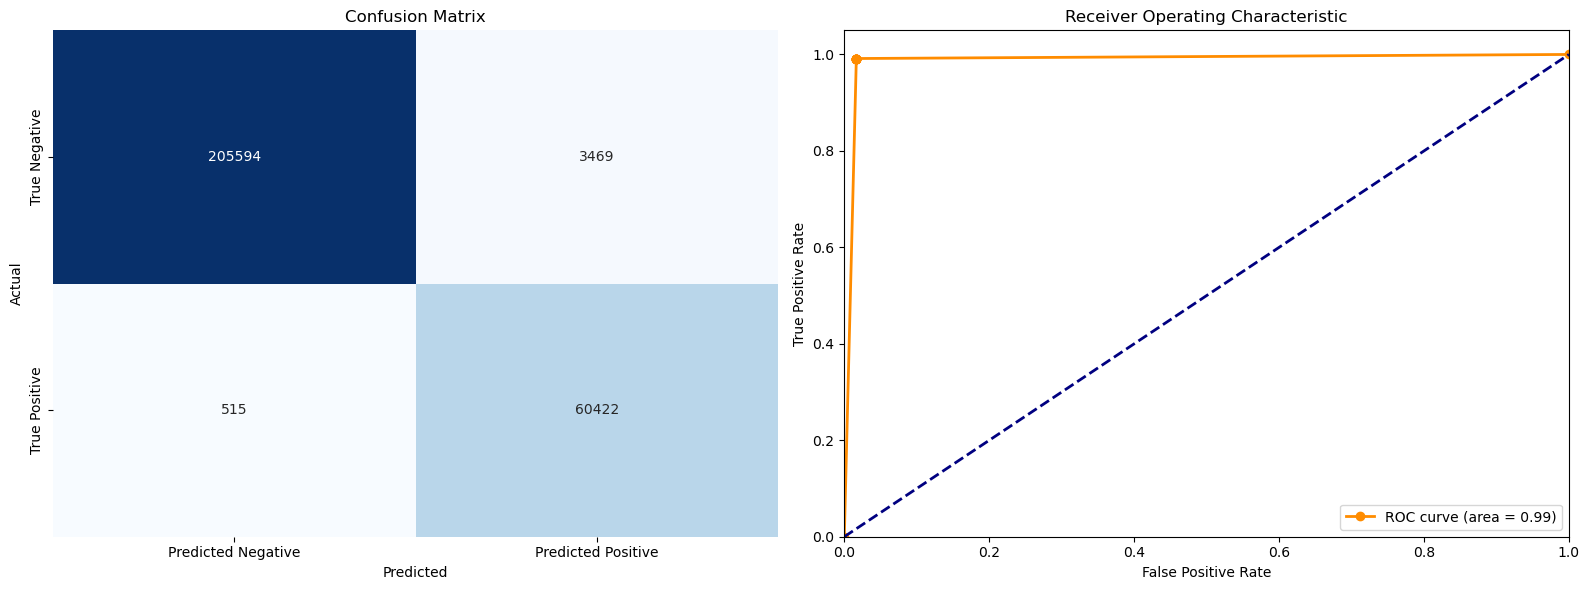

/tmp/ipykernel_46063/3974720186.py:12: RuntimeWarning: invalid value encountered in divide
  probability = numerator/denominator


              precision    recall  f1-score   support

           0       1.00      0.97      0.98    209063
           1       0.90      0.99      0.95     60937

    accuracy                           0.97    270000
   macro avg       0.95      0.98      0.96    270000
weighted avg       0.98      0.97      0.97    270000

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
IOU :  0.8976735894464747


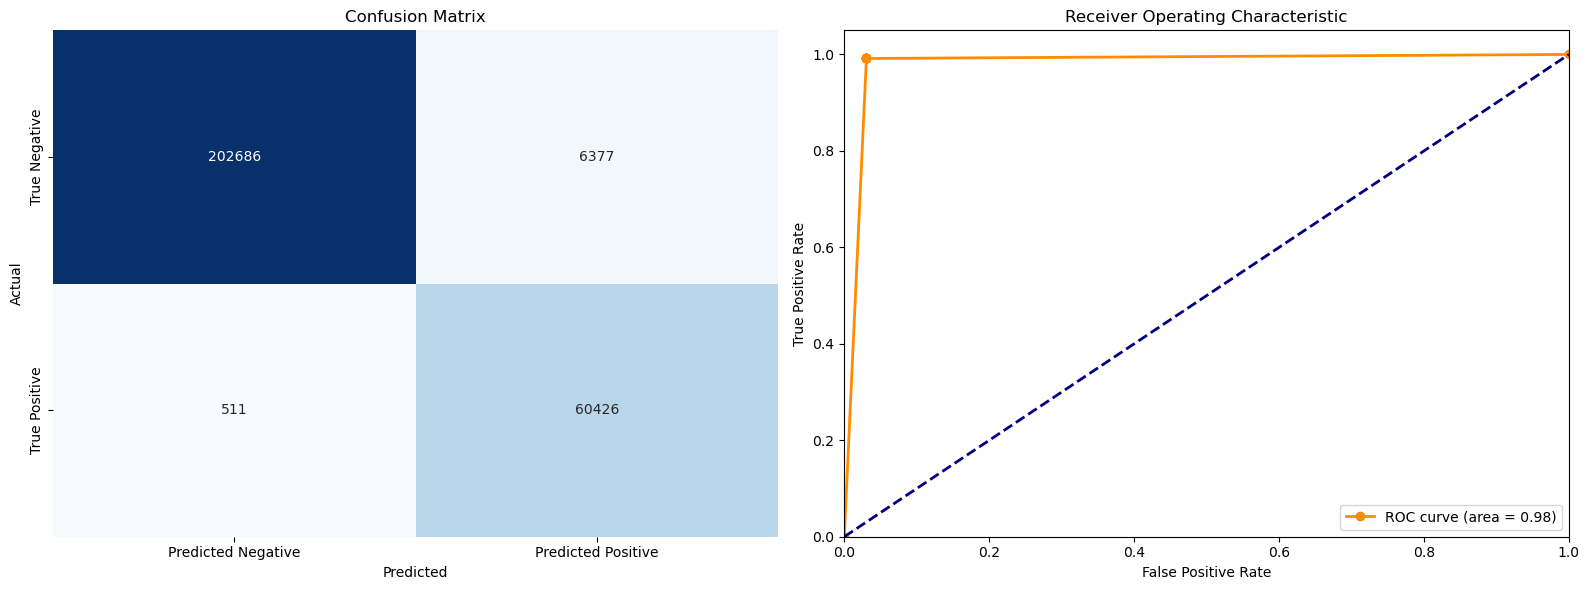

/tmp/ipykernel_46063/3974720186.py:12: RuntimeWarning: invalid value encountered in divide
  probability = numerator/denominator


              precision    recall  f1-score   support

           0       1.00      0.97      0.98    209063
           1       0.90      0.99      0.94     60937

    accuracy                           0.97    270000
   macro avg       0.95      0.98      0.96    270000
weighted avg       0.98      0.97      0.97    270000

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
IOU :  0.8915332616603585


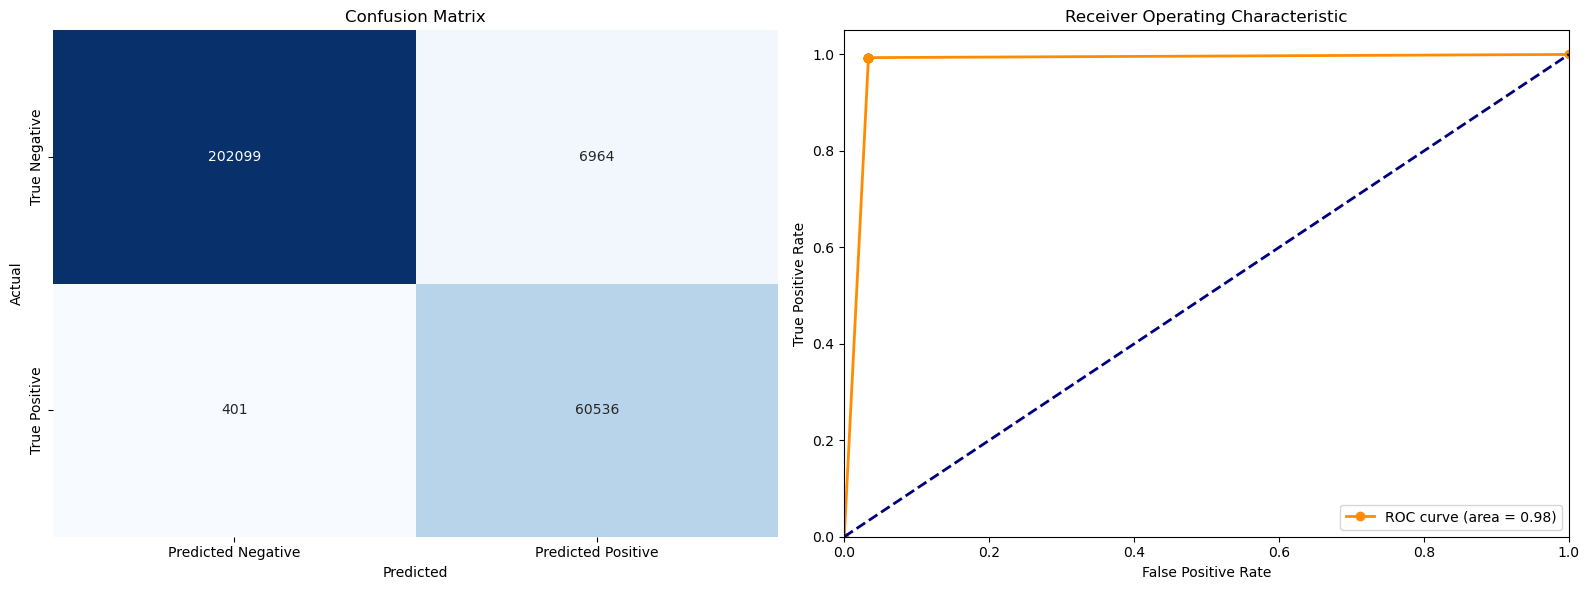

In [59]:
# so we need to pick 3 sets of different features. So this will mean that x will not be an element of R^15 anymore. 
# Sets will be [rgb],[rgb prewit],[rgb,hsv],[prewit]
# these are the features stored in the feature flattened array
    # features = [
    #     vert_prewitt_r, hori_prewitt_r,
    #     vert_prewitt_g, hori_prewitt_g,
    #     vert_prewitt_b, hori_prewitt_b,
    #     laplace_r, laplace_g, laplace_b,
    #     r, g, b,
    #     h, s, v
    # ]
#flattened_features = np.array([f[binary_mask].flatten() for f in features])
# we need arrays that represent the just the features of that we want to select. 
# by selecting the indecies of the result of of the feature extraction we can select specific features
# we then pass these into the vectorized_prediction. This result is then fed into parts 5 and six to compare results


# the indecies that relate to each feature
rgb_ind = np.array([9,10,11])
prewit_ind = np.array([0,1,2,3,4,5])
laplace_ind = np.array([6,7,8])
hsv_ind = np.array([12,13,14])

comparative_feature_set = [rgb_ind,#rgb
                            np.concatenate((rgb_ind,prewit_ind),axis=None),# rgb prewit
                            np.concatenate((rgb_ind,prewit_ind,laplace_ind),axis=None)#rgb prewit laplace
                            ]


# get features
original_features = getFeatures(original, null, show_plot= False)
fg_features = getFeatures(original, mask, show_plot=False)
bg_features = getFeatures(original, inverse_mask, show_plot=False)
# Get Validation 
validation_img = cv2.imread("Images/image-83.jpg")
# this is only used for the accuracy measure since it represents the foreground
validation_mask = cv2.imread("Images/mask-83.png", cv2.IMREAD_GRAYSCALE)
# use null mask since we want to classify evey pixel in the validation image
validation_features  = getFeatures(validation_img, null, show_plot=False)
# Divide features
for x in comparative_feature_set:
    sub_original_features = original_features[x]
    sub_fg_features = fg_features[x]
    sub_bg_features = bg_features[x]
    sub_validation_features = validation_features[x]
    # Determine feature matrix, mean and covariance of forground and background
    sub_original_feature_matrix = np.stack(sub_original_features, axis=-1)
    sub_fg_feature_matrix = np.stack(sub_fg_features, axis=-1)
    sub_fg_mean_vector = np.mean(sub_fg_feature_matrix, axis=0)
    sub_fg_cov_matrix = np.cov(sub_fg_feature_matrix, rowvar=False)
    sub_bg_feature_matrix = np.stack(sub_bg_features, axis=-1)
    sub_bg_mean_vector = np.mean(sub_bg_feature_matrix, axis=0)
    sub_bg_cov_matrix = np.cov(sub_bg_feature_matrix, rowvar=False)

    # pass features into vectorised prediction
    sub_verify_img = vectorized_prediction(sub_validation_features, sub_fg_mean_vector, sub_fg_cov_matrix, sub_bg_mean_vector, sub_bg_cov_matrix)

    # plt.imshow(sub_verify_img)
    # plt.show()
    
    theta = 0.5
    sub_thresholded_img = sub_verify_img.copy() > theta

    # Confusion matrix & Classification
    sub_verify_img = sub_thresholded_img.astype(int).flatten()
    validation_mask =( validation_mask > 0.99).astype(int).flatten()
    print(classification_report(validation_mask, sub_verify_img))
    conf_matrix = confusion_matrix(validation_mask, sub_verify_img)    
    
    # Roc curve
    theta = np.linspace(0.0, 1.0, 10)
    print(theta)

    validation_mask = cv2.imread("Images/mask-83.png", cv2.IMREAD_GRAYSCALE)
    validation_mask  = (validation_mask >0.99).astype(int).flatten()

    tpr_values = [0]
    fpr_values = [0]

    for thresh in theta:
        # Apply threshold to get binary predictions
        sub_thresholded_img = np.where(sub_verify_img > thresh, sub_verify_img, 0).flatten()
        # Calculate FPR and TPR
        fpr, tpr, _ = roc_curve(validation_mask, sub_thresholded_img)
        
        # Store FPR and TPR values
        tpr_values.append(tpr[1])  # True Positive Rate (Recall)
        fpr_values.append(fpr[1])  # False Positive Rate

    # Calculate AUC
    roc_auc = auc(fpr_values, tpr_values)
    # IOU Score
    print("IOU : ",get_IOU_PosNeg(sub_verify_img,validation_mask))
    # Display Graphs
    
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))
    
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['True Negative', 'True Positive'],ax=axs[0])
    axs[0].set_xlabel('Predicted')
    axs[0].set_ylabel('Actual')
    axs[0].set_title('Confusion Matrix')
    
    axs[1].plot(fpr_values, tpr_values, marker='o', color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    axs[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axs[1].set_xlim([0.0, 1.0])
    axs[1].set_ylim([0.0, 1.05])
    axs[1].set_xlabel('False Positive Rate')
    axs[1].set_ylabel('True Positive Rate')
    axs[1].set_title('Receiver Operating Characteristic')
    axs[1].legend(loc="lower right")
    plt.tight_layout()
    plt.show()
    
    # def vectorized_prediction(validation_features, fg_mean_vector,fg_cov_matrix,bg_mean_vector,bg_cov_matrix):
    # Display comparative data

# Question 8 
The model with the RGB features has the best F1 scores and the best IOU scores. This is the case as the background is consistently beige while the puzzle piece has different colors (with exception of Elsas hair)

In [ ]:
rgb_ind = np.array([9,10,11])
prewit_ind = np.array([0,1,2,3,4,5])
laplace_ind = np.array([6,7,8])
hsv_ind = np.array([12,13,14])

comparative_feature_set = [rgb_ind]


# get features
original_features = getFeatures(original, null, show_plot= False)
fg_features = getFeatures(original, mask, show_plot=False)
bg_features = getFeatures(original, inverse_mask, show_plot=False)
# Get Validation 
validation_img = cv2.imread("Images/image-110.jpg")
# this is only used for the accuracy measure since it represents the foreground
validation_mask = cv2.imread("Images/mask-110.png", cv2.IMREAD_GRAYSCALE)
# use null mask since we want to classify evey pixel in the validation image
validation_features  = getFeatures(validation_img, null, show_plot=False)
# Divide features
for x in comparative_feature_set:
    sub_original_features = original_features[x]
    sub_fg_features = fg_features[x]
    sub_bg_features = bg_features[x]
    sub_validation_features = validation_features[x]
    # Determine feature matrix, mean and covariance of forground and background
    sub_original_feature_matrix = np.stack(sub_original_features, axis=-1)
    sub_fg_feature_matrix = np.stack(sub_fg_features, axis=-1)
    sub_fg_mean_vector = np.mean(sub_fg_feature_matrix, axis=0)
    sub_fg_cov_matrix = np.cov(sub_fg_feature_matrix, rowvar=False)
    sub_bg_feature_matrix = np.stack(sub_bg_features, axis=-1)
    sub_bg_mean_vector = np.mean(sub_bg_feature_matrix, axis=0)
    sub_bg_cov_matrix = np.cov(sub_bg_feature_matrix, rowvar=False)

    # pass features into vectorised prediction
    sub_verify_img = vectorized_prediction(sub_validation_features, sub_fg_mean_vector, sub_fg_cov_matrix, sub_bg_mean_vector, sub_bg_cov_matrix)

    # plt.imshow(sub_verify_img)
    # plt.show()
    plt.imshow(sub_verify_img,cmap = "gray")
    plt.show()
    theta = 0.5
    sub_thresholded_img = sub_verify_img.copy() > theta

    # Confusion matrix & Classification
    sub_verify_img = sub_thresholded_img.astype(int).flatten()
    validation_mask =( validation_mask > 0.99).astype(int).flatten()
    print(classification_report(validation_mask, sub_verify_img))
    conf_matrix = confusion_matrix(validation_mask, sub_verify_img)    
    
    # Roc curve
    theta = np.linspace(0.0, 1.0, 10)
    print(theta)

    validation_mask = cv2.imread("Images/mask-110.png", cv2.IMREAD_GRAYSCALE)
    validation_mask  = (validation_mask >0.99).astype(int).flatten()

    tpr_values = [0]
    fpr_values = [0]

    for thresh in theta:
        # Apply threshold to get binary predictions
        sub_thresholded_img = np.where(sub_verify_img > thresh, sub_verify_img, 0).flatten()
        # Calculate FPR and TPR
        fpr, tpr, _ = roc_curve(validation_mask, sub_thresholded_img)
        
        # Store FPR and TPR values
        tpr_values.append(tpr[1])  # True Positive Rate (Recall)
        fpr_values.append(fpr[1])  # False Positive Rate

    # Calculate AUC
    roc_auc = auc(fpr_values, tpr_values)
    # IOU Score
    print("IOU : ",get_IOU_PosNeg(sub_verify_img,validation_mask))
    # Display Graphs
    
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))
    
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['True Negative', 'True Positive'],ax=axs[0])
    axs[0].set_xlabel('Predicted')
    axs[0].set_ylabel('Actual')
    axs[0].set_title('Confusion Matrix')
    
    axs[1].plot(fpr_values, tpr_values, marker='o', color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    axs[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axs[1].set_xlim([0.0, 1.0])
    axs[1].set_ylim([0.0, 1.05])
    axs[1].set_xlabel('False Positive Rate')
    axs[1].set_ylabel('True Positive Rate')
    axs[1].set_title('Receiver Operating Characteristic')
    axs[1].legend(loc="lower right")
    plt.tight_layout()
    plt.show()
    
    # def vectorized_prediction(validation_features, fg_mean_vector,fg_cov_matrix,bg_mean_vector,bg_cov_matrix):
    # Display comparative data

# Question 9 Test Image
using threshold 0.5

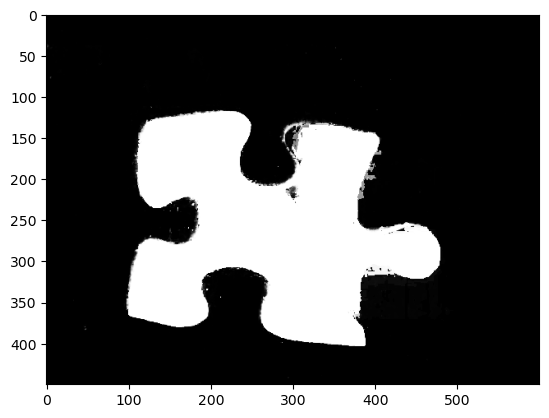

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    208635
           1       0.93      0.99      0.96     61365

    accuracy                           0.98    270000
   macro avg       0.97      0.98      0.97    270000
weighted avg       0.98      0.98      0.98    270000

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
IOU :  0.9229608861936034


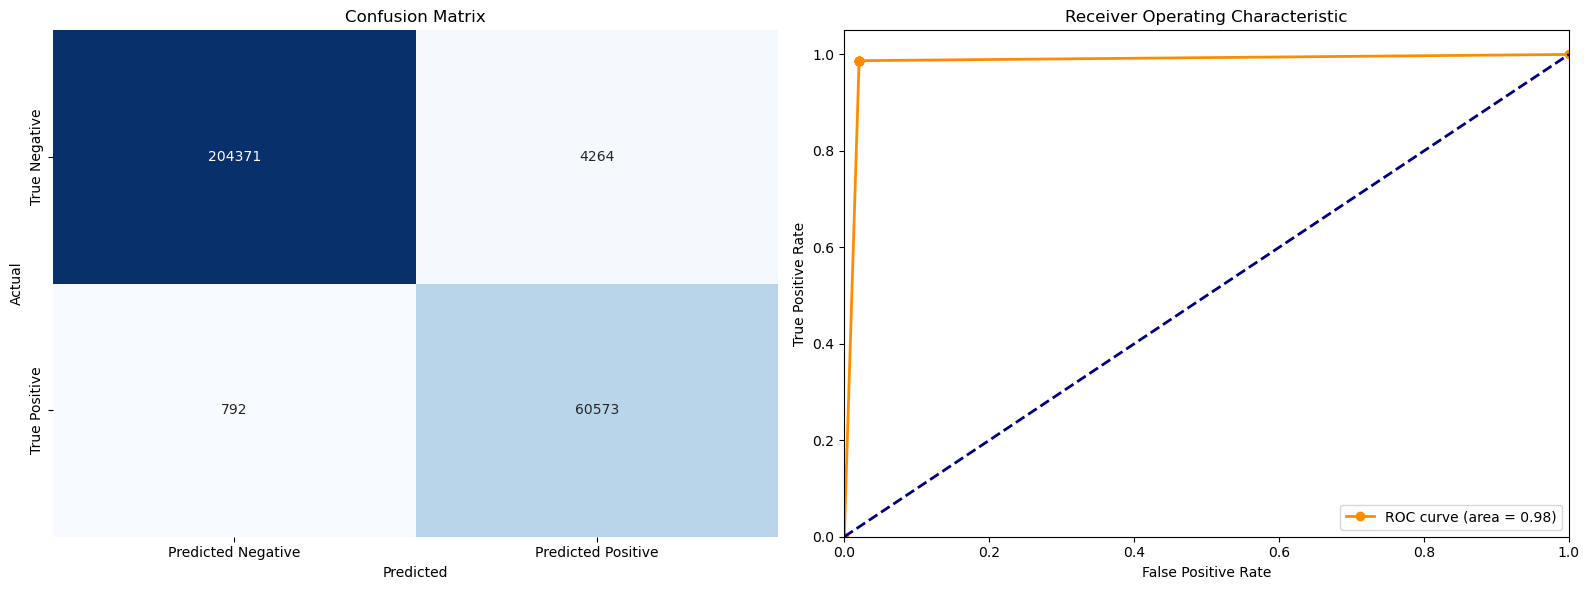

In [73]:
# so we need to pick 3 sets of different features. So this will mean that x will not be an element of R^15 anymore. 
# Sets will be [rgb],[rgb prewit],[rgb,hsv],[prewit]
# these are the features stored in the feature flattened array
    # features = [
    #     vert_prewitt_r, hori_prewitt_r,
    #     vert_prewitt_g, hori_prewitt_g,
    #     vert_prewitt_b, hori_prewitt_b,
    #     laplace_r, laplace_g, laplace_b,
    #     r, g, b,
    #     h, s, v
    # ]
#flattened_features = np.array([f[binary_mask].flatten() for f in features])
# we need arrays that represent the just the features of that we want to select. 
# by selecting the indecies of the result of of the feature extraction we can select specific features
# we then pass these into the vectorized_prediction. This result is then fed into parts 5 and six to compare results


# the indecies that relate to each feature
rgb_ind = np.array([9,10,11])
prewit_ind = np.array([0,1,2,3,4,5])
laplace_ind = np.array([6,7,8])
hsv_ind = np.array([12,13,14])

comparative_feature_set = [rgb_ind]


# get features
original_features = getFeatures(original, null, show_plot= False)
fg_features = getFeatures(original, mask, show_plot=False)
bg_features = getFeatures(original, inverse_mask, show_plot=False)
# Get Validation 
validation_img = cv2.imread("Images/image-110.jpg")
# this is only used for the accuracy measure since it represents the foreground
validation_mask = cv2.imread("Images/mask-110.png", cv2.IMREAD_GRAYSCALE)
# use null mask since we want to classify evey pixel in the validation image
validation_features  = getFeatures(validation_img, null, show_plot=False)
# Divide features
for x in comparative_feature_set:
    sub_original_features = original_features[x]
    sub_fg_features = fg_features[x]
    sub_bg_features = bg_features[x]
    sub_validation_features = validation_features[x]
    # Determine feature matrix, mean and covariance of forground and background
    sub_original_feature_matrix = np.stack(sub_original_features, axis=-1)
    sub_fg_feature_matrix = np.stack(sub_fg_features, axis=-1)
    sub_fg_mean_vector = np.mean(sub_fg_feature_matrix, axis=0)
    sub_fg_cov_matrix = np.cov(sub_fg_feature_matrix, rowvar=False)
    sub_bg_feature_matrix = np.stack(sub_bg_features, axis=-1)
    sub_bg_mean_vector = np.mean(sub_bg_feature_matrix, axis=0)
    sub_bg_cov_matrix = np.cov(sub_bg_feature_matrix, rowvar=False)

    # pass features into vectorised prediction
    sub_verify_img = vectorized_prediction(sub_validation_features, sub_fg_mean_vector, sub_fg_cov_matrix, sub_bg_mean_vector, sub_bg_cov_matrix)

    plt.imshow(sub_verify_img, cmap="gray")
    plt.show()
    
    theta = 0.5
    sub_thresholded_img = sub_verify_img.copy() > theta

    # Confusion matrix & Classification
    sub_verify_img = sub_thresholded_img.astype(int).flatten()
    validation_mask =( validation_mask > 0.99).astype(int).flatten()
    print(classification_report(validation_mask, sub_verify_img))
    conf_matrix = confusion_matrix(validation_mask, sub_verify_img)    
    
    # Roc curve
    theta = np.linspace(0.0, 1.0, 10)
    print(theta)

    validation_mask = cv2.imread("Images/mask-110.png", cv2.IMREAD_GRAYSCALE)
    validation_mask  = (validation_mask >0.99).astype(int).flatten()

    tpr_values = [0]
    fpr_values = [0]

    for thresh in theta:
        # Apply threshold to get binary predictions
        sub_thresholded_img = np.where(sub_verify_img > thresh, sub_verify_img, 0).flatten()
        # Calculate FPR and TPR
        fpr, tpr, _ = roc_curve(validation_mask, sub_thresholded_img)
        
        # Store FPR and TPR values
        tpr_values.append(tpr[1])  # True Positive Rate (Recall)
        fpr_values.append(fpr[1])  # False Positive Rate

    # Calculate AUC
    roc_auc = auc(fpr_values, tpr_values)
    # IOU Score
    print("IOU : ",get_IOU_PosNeg(sub_verify_img,validation_mask))
    # Display Graphs
    
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))
    
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['True Negative', 'True Positive'],ax=axs[0])
    axs[0].set_xlabel('Predicted')
    axs[0].set_ylabel('Actual')
    axs[0].set_title('Confusion Matrix')
    
    axs[1].plot(fpr_values, tpr_values, marker='o', color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    axs[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axs[1].set_xlim([0.0, 1.0])
    axs[1].set_ylim([0.0, 1.05])
    axs[1].set_xlabel('False Positive Rate')
    axs[1].set_ylabel('True Positive Rate')
    axs[1].set_title('Receiver Operating Characteristic')
    axs[1].legend(loc="lower right")
    plt.tight_layout()
    plt.show()
    
    # def vectorized_prediction(validation_features, fg_mean_vector,fg_cov_matrix,bg_mean_vector,bg_cov_matrix):
    # Display comparative data

# 10
- The IOU Score does drop by a percent, assumedly because the Elsas hair appears more in this image. A big difference between the piece and the carpet is the texture. A texture reading filter could be used. Sadly textons are classification and cannot return a value to fit the gaussian spaces, Gabor features are another texture sensing technique that can be used. 
    - The error come from RGB values of the puzzle being close to the RGB values of the background board.

- Improving the models performance
    - Image pre-processing: salt and pepper noise reduction to remove the  spots from the background, removes noise from the image
    - Using laplacian of gaussians (or any averaging filter) to remove the fine detail not relevant and remove noise.
    - The normal distrubution used in the classifier is not true representation of the foreground and background pixels. 